# Statistical Modelling and Design of Experiments

# 1st Assignment

### Beata Baczyńska

#### Packages

In [1]:
install.packages("RcmdrMisc")
install.packages("gmodels")
install.packages("aplpack")
install.packages("lmtest")
install.packages("Rcmdr", dependencies = TRUE)
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘proxy’, ‘car’, ‘sandwich’, ‘abind’, ‘Hmisc’, ‘e1071’, ‘readstata13’, ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is un

In [425]:
library(gmodels)
library(aplpack)
library(RcmdrMisc)
library(lmtest)
library(FactoMineR)
library(car)
library(devtools)

# FIRST QUESTION: VISUALISATION, CHI SQUARE AND T-TEST

In [426]:
mydata = read.csv("sample_data/decathlon.csv")
head(mydata)

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
2,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
3,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
4,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
5,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
6,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


The dataset shows results for decathlon competition.
This competition consists of 10 different disciplines.
- 100m (unit: seconds)
- Long jump (unit: metres)
- Shot put (unit: metres)
- High jump (unit: metres)
- 400 m (unit: seconds)
- 100 m hurdles (unit: seconds)
- Discus (unit: metres)
- Pole vault (unit: metres)
- Javelin (unit: metres)
- 1500 m (unit: seconds)
 
All columns with results for these disciplines consist of quantitative variables.
 
Also 'Points' are quantitative variables.
 
'Rank' and 'Competition' are both qualitative variables.
 
For 'Competition' we are having two values: 'Decastar' and 'OlympicG'. The Decastar is an annual event and the Olympic is every 4 years, so we expect players in the OlympicG competition to have slightly better results (we are only guessing now).


## Analyze the distribution of “X100m” according to the type of competition by using boxplot. Write your conclusion.

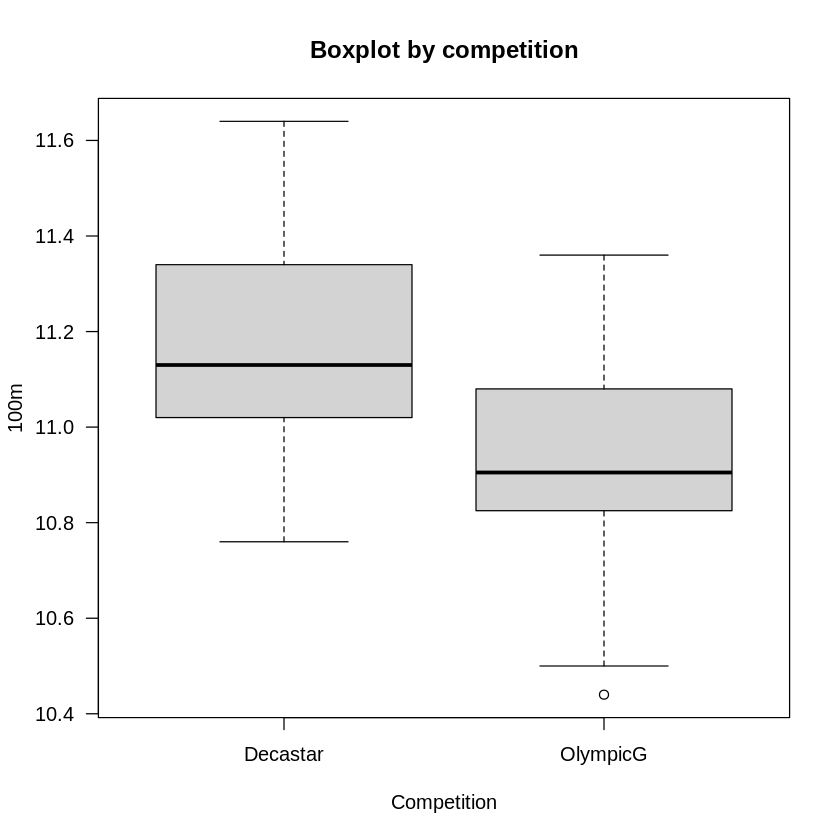

In [427]:
boxplot(mydata$X100m ~ mydata$Competition, main="Boxplot by competition", ylab="100m", xlab="Competition", las=1)

The boxplot method shows us the groups of numerical data through their quartiles. The bold line indicates the median, so the value above which we find 50% of data and below which we find another 50% of data. The upper bound of the box indicates the 3rd quartile and below the bound of the box the 1st quartile.  Outliersare marked as dots.The median during the OlympicG competition is lower than for Decastar competition.  The distance between 75% and 25% is lower for OlympicG competition.Whole range for Decastar competition is 11.65 - 10.75 = 0.9 seconds and for OlympicG: 11.4 - 10.5 = 0.9 seconds, however for OlympicG the range between second and third quarter is tighter. For OlypicG we can also notice one outlier with value ~ 10.4.

## Create a new categorical variable with two categories from the variable “X100m” by using 11 seconds as the cut-off point. Make a cross table from the new categorical variable and the “Competition”. Are these two variables independent? Write your conclusion by checking marginal probabilities and test the independency of two variables by using Chi-Square test.

In [428]:
mydata$X100m11[mydata$X100m >= 11] <- "slower"
mydata$X100m11[mydata$X100m < 11] <- "faster"

head(mydata)

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition,X100m11
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,slower
2,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,faster
3,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,slower
4,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,slower
5,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,slower
6,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar,slower


In [429]:
CrossTable(mydata$X100m11, mydata$Competition, chisq=TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  41 

 
               | mydata$Competition 
mydata$X100m11 |  Decastar |  OlympicG | Row Total | 
---------------|-----------|-----------|-----------|
        faster |         2 |        19 |        21 | 
               |     3.259 |     1.513 |           | 
               |     0.095 |     0.905 |     0.512 | 
               |     0.154 |     0.679 |           | 
               |     0.049 |     0.463 |           | 
---------------|-----------|-----------|-----------|
        slower |        11 |         9 |        20 | 
               |     3.422 |     1.589 |           | 
               |     0.550 |     0.450 |     0.488 | 
               |     0.846 |     0.321 |           | 
               |     0.268 |     0.220 |           | 
-------

The marginal probabilities are giving us an idea about the proportion between columns (number of people in Decastar/OlympicG competition) and between rows (number of people with result better/worse than 11 seconds on 100 meters).
We can see that there are more people in OlympicG competition (68.3%) than in Decastar (31.7%). The proportion between results better than 11 seconds and worse is more or less equal (51.2% and 48.8%).
However, when we check cross table values we can see that in the Decastar competition there are only 2 people marked as 'faster' and 11 marked as 'slower'. The Conditional probability P('faster'|Decastar) = 0.154 and P('slower'|Decastar) = 0.846. For the OlympicG competition there are more people marked as 'faster' (19 people) than those marked as 'slower' (9 people). The Conditional probability here is: P('faster'|OlympicG) = 0.679 and P('slower'|OlympicG) = 0.321.
Also when we read conditional probabilities P(Olympic|'faster') = 0.905 and P(Decastar|'faster') = 0.095 We can notice that there are faster people in OlympicG competition.
 
In my opinion this disproportion suggests that these two variables: Competition and categorical result on 100 meters are dependent.


The p-values for both Chi-squared tests (with and without Yates' correction) are very small. We should reject our Ho hypothesis. That means the variables ”Competition” and ”X100m11” are dependent.

## Visualize the distribution of quantitative variables by using proper graph. Which of these variables follow a Normal distribution?


	Shapiro-Wilk normality test

data:  mydata$X100m
W = 0.9818, p-value = 0.7435


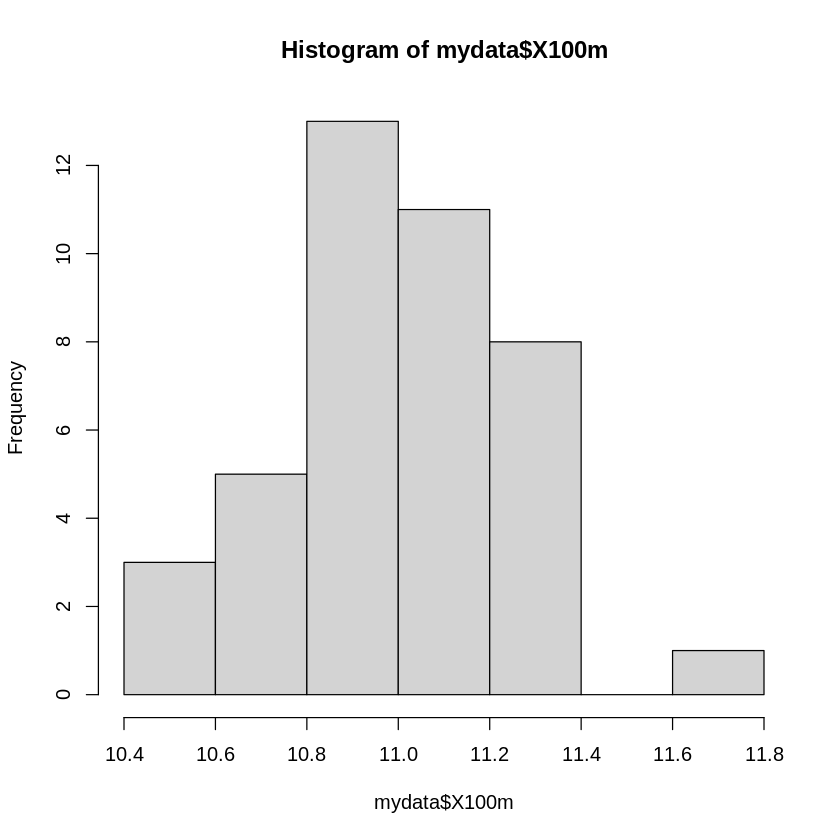


	Shapiro-Wilk normality test

data:  mydata$Long.jump
W = 0.98763, p-value = 0.9289


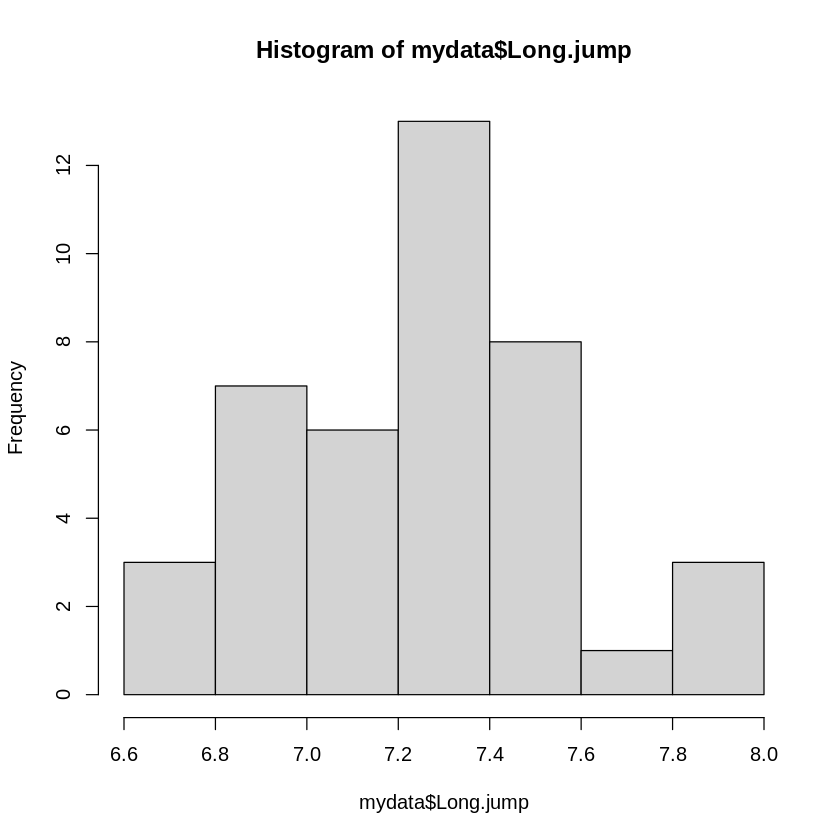


	Shapiro-Wilk normality test

data:  mydata$Shot.put
W = 0.9884, p-value = 0.9456


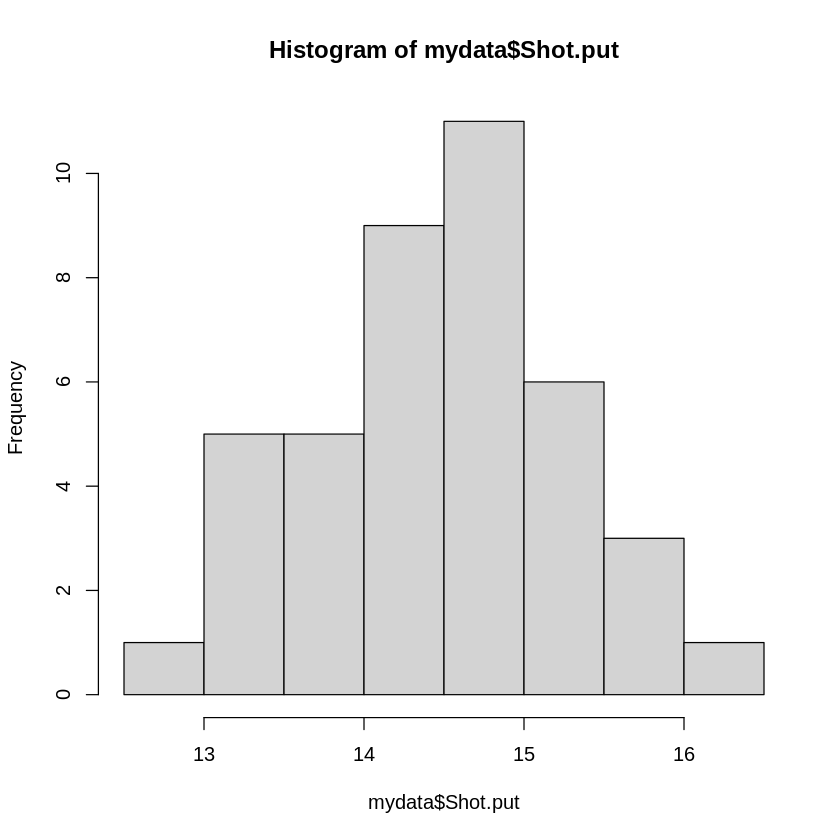


	Shapiro-Wilk normality test

data:  mydata$High.jump
W = 0.93734, p-value = 0.0255


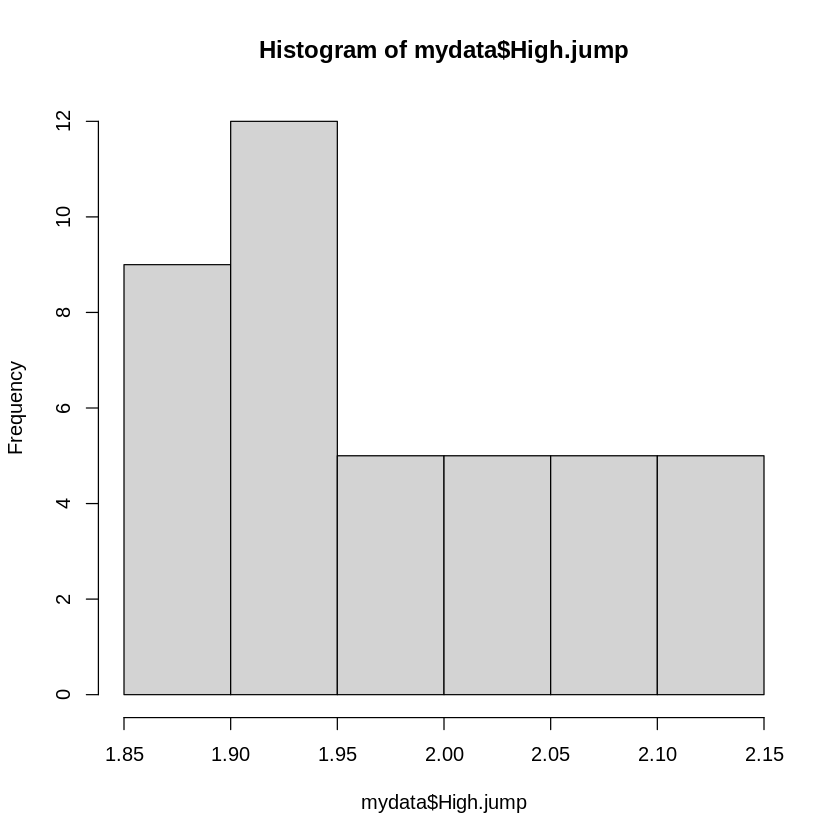


	Shapiro-Wilk normality test

data:  mydata$X400m
W = 0.95714, p-value = 0.1248


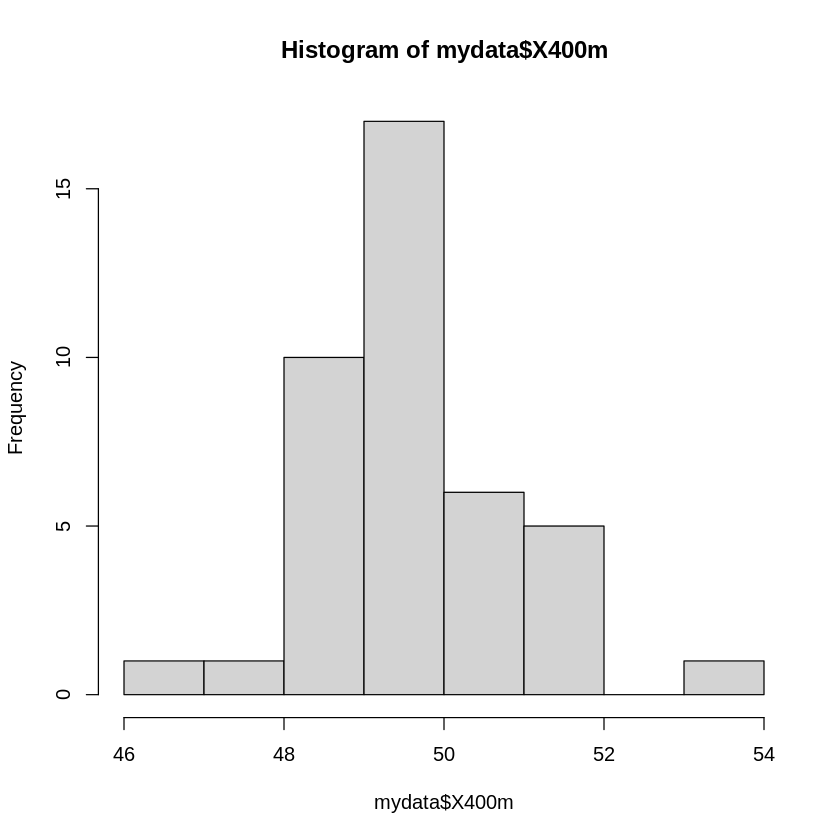


	Shapiro-Wilk normality test

data:  mydata$X110m.hurdle
W = 0.93087, p-value = 0.01544


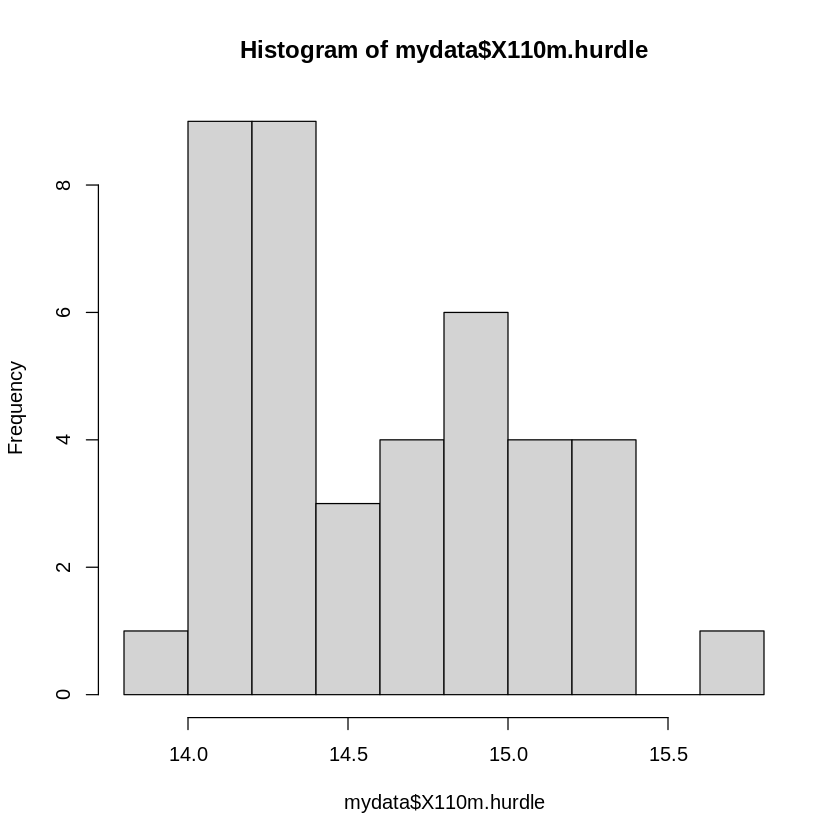


	Shapiro-Wilk normality test

data:  mydata$Pole.vault
W = 0.97003, p-value = 0.3456


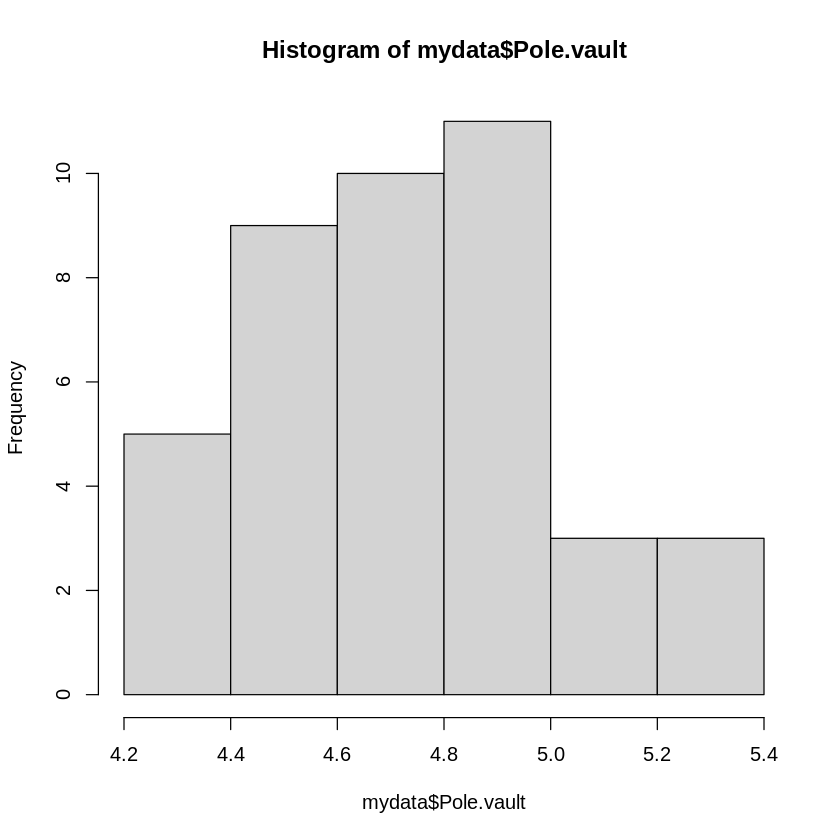


	Shapiro-Wilk normality test

data:  mydata$Javeline
W = 0.97106, p-value = 0.3732


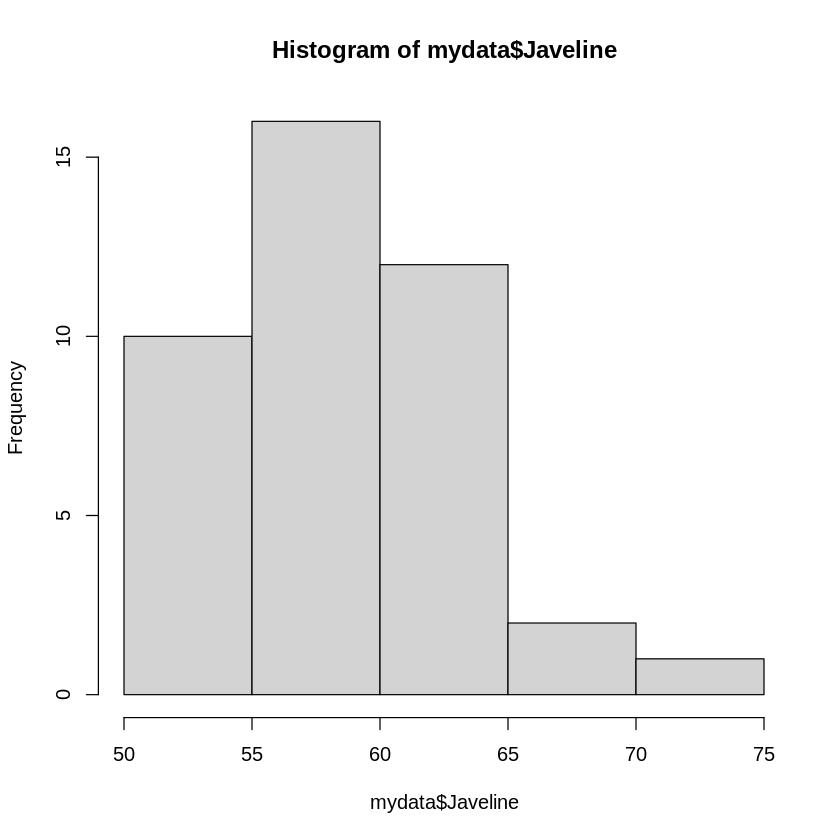


	Shapiro-Wilk normality test

data:  mydata$X1500m
W = 0.93652, p-value = 0.02391


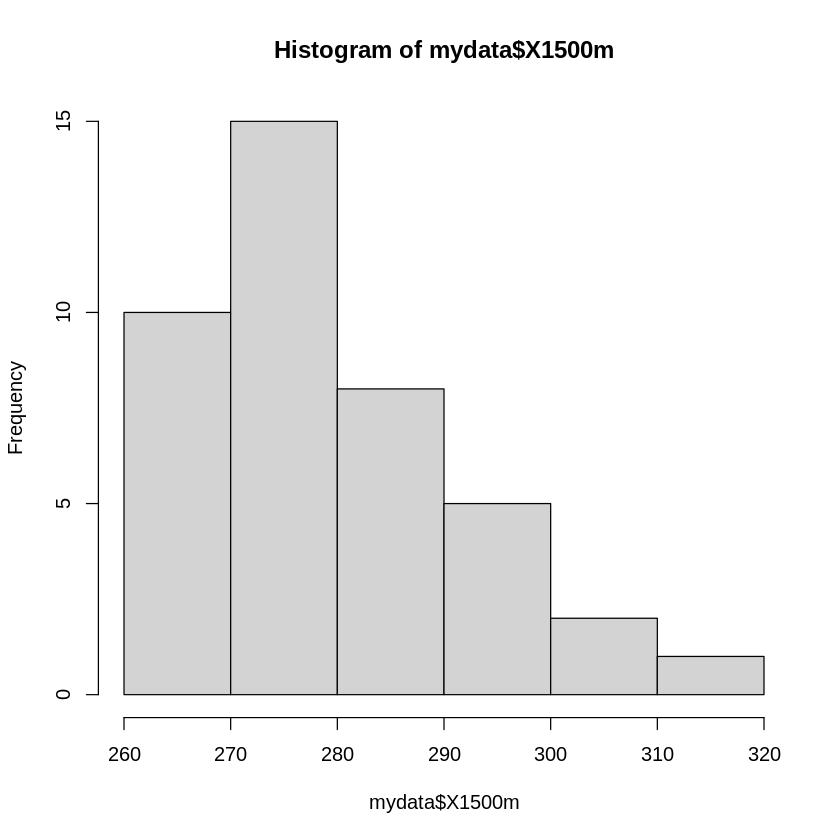


	Shapiro-Wilk normality test

data:  mydata$Points
W = 0.95584, p-value = 0.1123


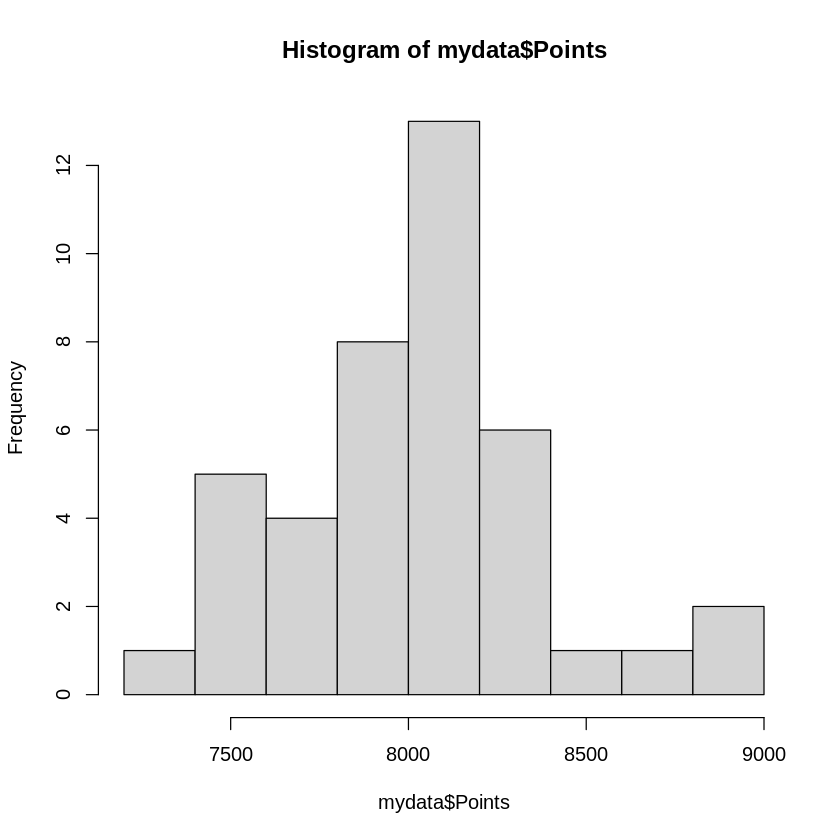

In [569]:
hist(mydata$X100m)
shapiro.test(mydata$X100m)

hist(mydata$Long.jump)
shapiro.test(mydata$Long.jump)

hist(mydata$Shot.put)
shapiro.test(mydata$Shot.put)

hist(mydata$High.jump)
shapiro.test(mydata$High.jump)

hist(mydata$X400m)
shapiro.test(mydata$X400m)

hist(mydata$X110m.hurdle)
shapiro.test(mydata$X110m.hurdle)

hist(mydata$Pole.vault)
shapiro.test(mydata$Pole.vault)

hist(mydata$Javeline)
shapiro.test(mydata$Javeline)

hist(mydata$X1500m)
shapiro.test(mydata$X1500m)

hist(mydata$Points)
shapiro.test(mydata$Points)

By looking on the graph and checking if p-value in shapiro test is higher than 0.05, we can say that:

Variables:
- X100m
- Long.jump
- Shot.put
- X400m
- Pole.vault
- Javeline
- Points

follow Normal distribution.

Variables:
- High.jupm
- X110m.hurdle
- X1500m

don't follow Normal distribution.

## Generate three Normally distributed random variables of length 50. Two of them should have the same mean, different standard deviations while the third one has a different mean but the same standard deviation with the first distribution. Use t test to compare mean differences between three variables.

In [431]:
set.seed(5)

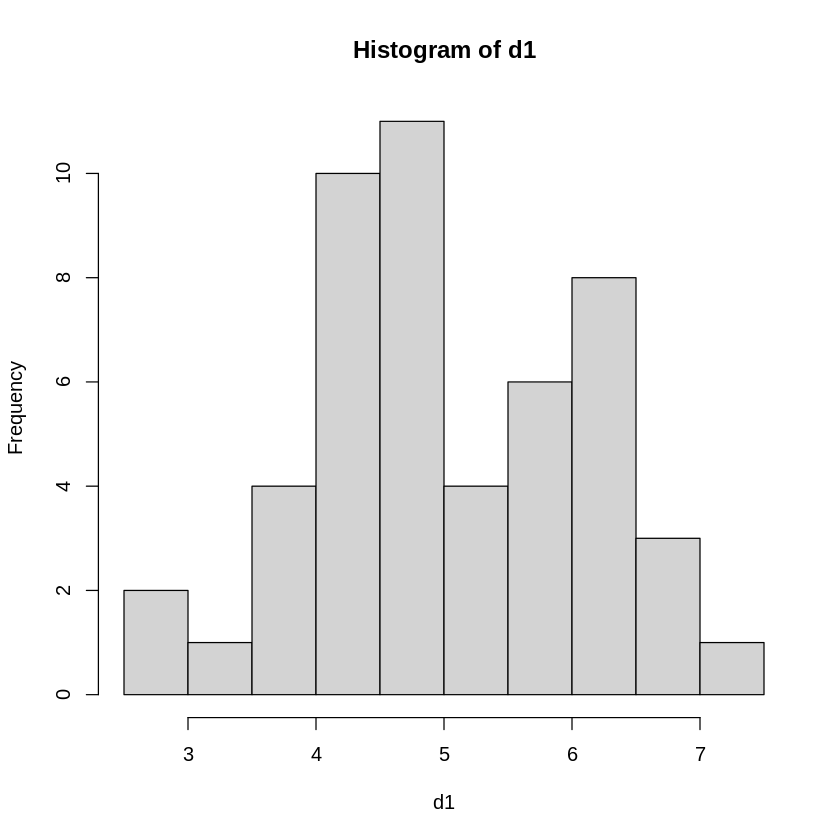

In [432]:
d1 <- rnorm(50, 5, 1)
hist(d1)

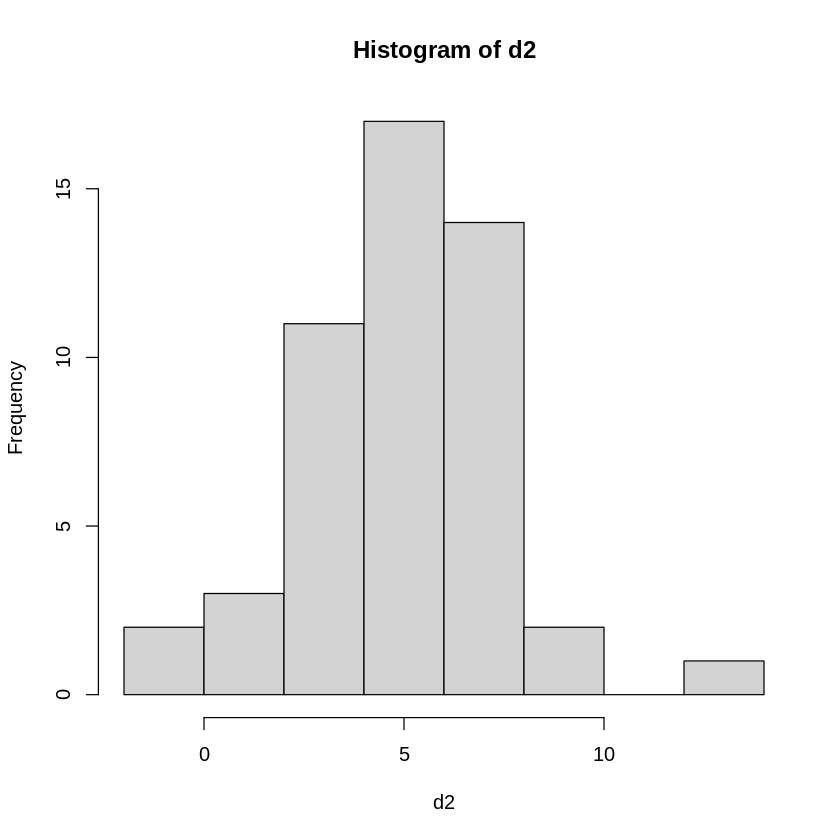

In [433]:
d2 <- rnorm(50, 5, 3)
hist(d2)

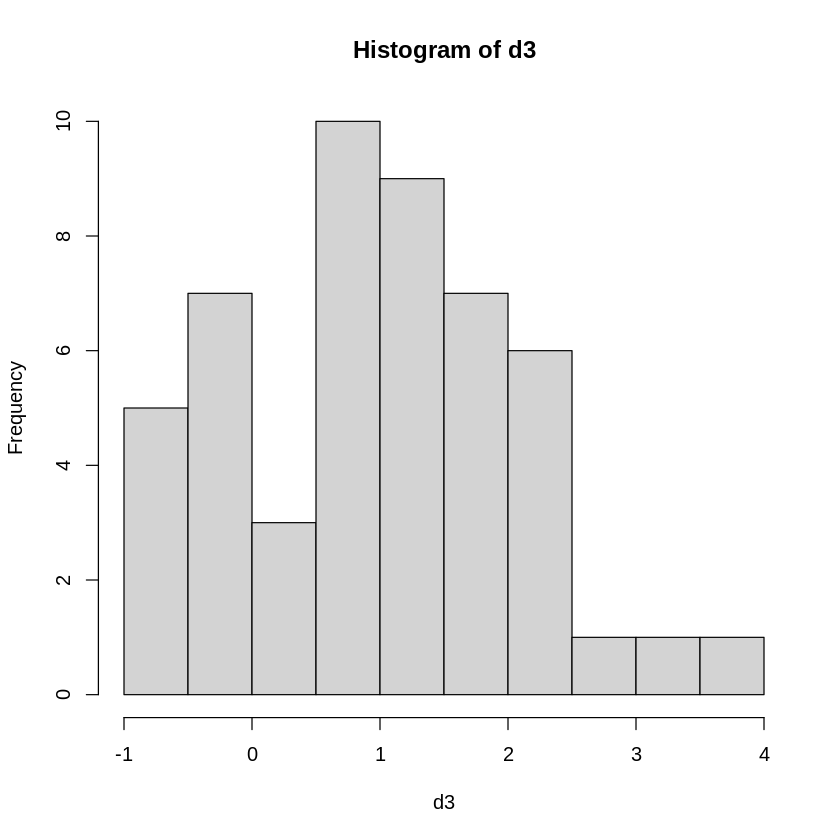

In [434]:
d3 <- rnorm(50, 1, 1)
hist(d3)

H0 - There is no statistically significant difference between the samples

In [435]:
t.test(d1, d2)


	Welch Two Sample t-test

data:  d1 and d2
t = 0.18568, df = 67.145, p-value = 0.8533
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6817320  0.8215868
sample estimates:
mean of x mean of y 
 5.064934  4.995007 


We do not reject H0 hypothesis as p-value is greater than 0.05

In [436]:
t.test(d1, d3, var.equal = T)


	Two Sample t-test

data:  d1 and d3
t = 18.83, df = 98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.666683 4.530578
sample estimates:
mean of x mean of y 
5.0649344 0.9663037 


We reject the H0 hypothesis as the p-value is smaller than 0.05.
There is significant difference


In [437]:
t.test(d2, d3) 


	Welch Two Sample t-test

data:  d2 and d3
t = 10.634, df = 68.385, p-value = 3.884e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.272819 4.784588
sample estimates:
mean of x mean of y 
4.9950070 0.9663037 


We reject the H0 hypothesis as the p-value is smaller than 0.05.
There is a significant difference.
 
We can see that for tests where distributions have different means we always had to reject the H0 hypothesis and accept that there is significant difference between distributions.


## Test if there is a difference between two type of competitions according to the variables “X100m” and “X400m” by using t test.


	Welch Two Sample t-test

data:  mydata$X100m[mydata$Competition == "Decastar"] and mydata$X100m[mydata$Competition == "OlympicG"]
t = 3.2037, df = 22.168, p-value = 0.00407
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09164794 0.42769272
sample estimates:
mean of x mean of y 
 11.17538  10.91571 


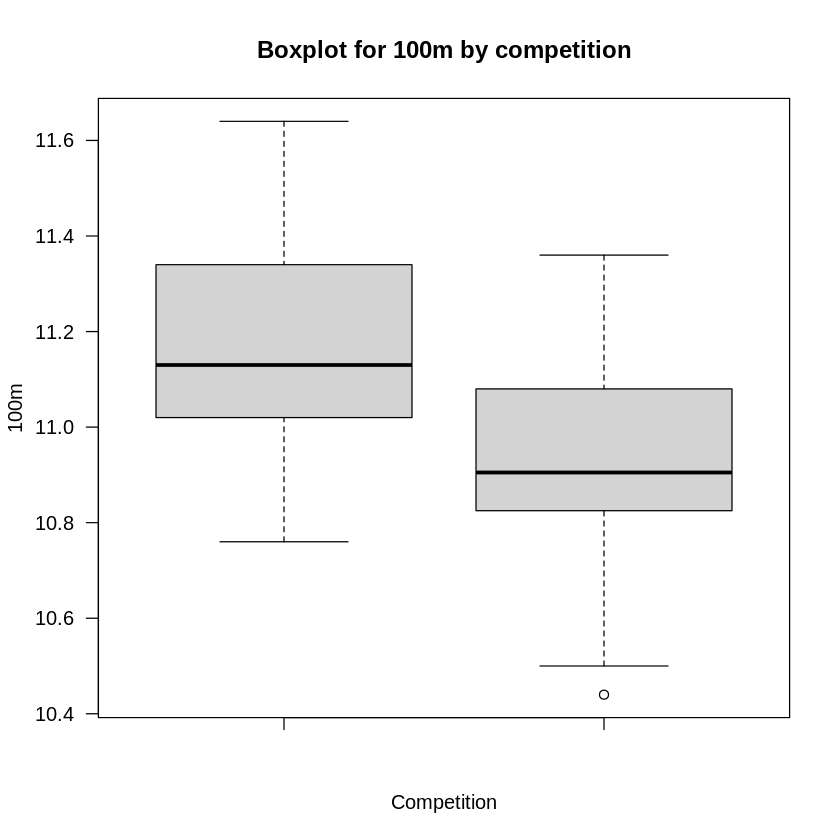

In [438]:
boxplot(mydata$X100m[mydata$Competition == "Decastar"], mydata$X100m[mydata$Competition == "OlympicG"], main="Boxplot for 100m by competition", ylab="100m", xlab="Competition", las=1)
t.test(mydata$X100m[mydata$Competition == "Decastar"], mydata$X100m[mydata$Competition == "OlympicG"])


We should reject the H0 hypothesis as the p-value is smaller than 0.05.
There is a significant difference.



	Welch Two Sample t-test

data:  mydata$X400m[mydata$Competition == "Decastar"] and mydata$X400m[mydata$Competition == "OlympicG"]
t = 0.05771, df = 32.106, p-value = 0.9543
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6858299  0.7258299
sample estimates:
mean of x mean of y 
    49.63     49.61 


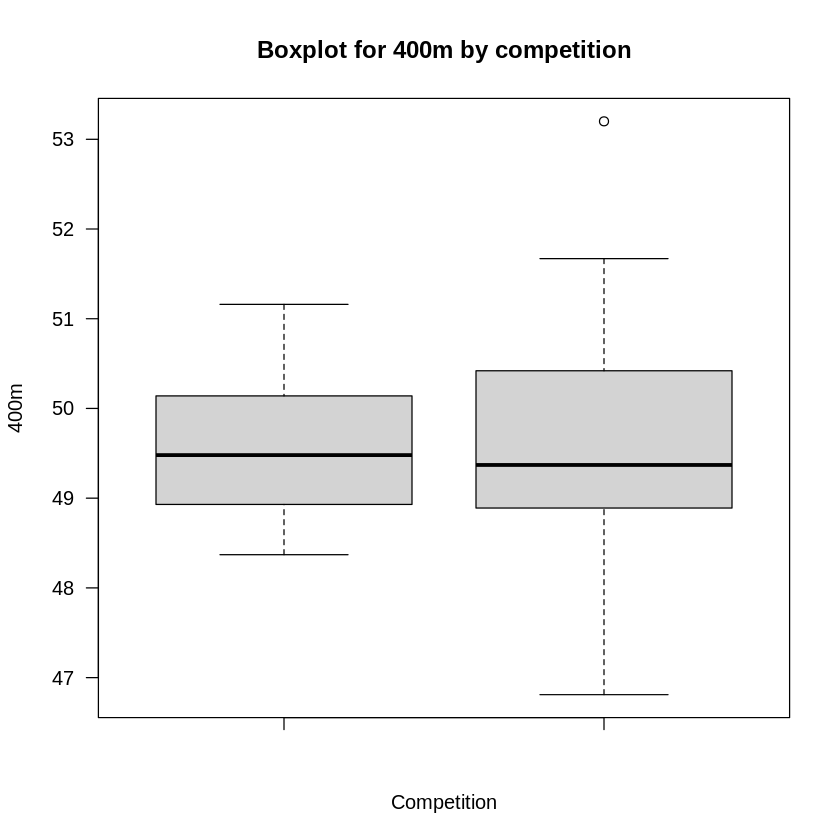

In [439]:
boxplot(mydata$X400m[mydata$Competition == "Decastar"], mydata$X400m[mydata$Competition == "OlympicG"], main="Boxplot for 400m by competition", ylab="400m", xlab="Competition", las=1)
t.test(mydata$X400m[mydata$Competition == "Decastar"], mydata$X400m[mydata$Competition == "OlympicG"])

We accept the H0 hypothesis as p-value is higher than 0.05.
There is no significant difference.


# SECOND QUESTION : ANOVA

## Generate three populations that follow a normal distribution, using your own algorithm. As an example, the first is a population that follows a normal distribution with a parameter mean=10, the second with mean=40, and the third with mean=10. Select the SAME variance for the three distributions at your convenience (a value >0).

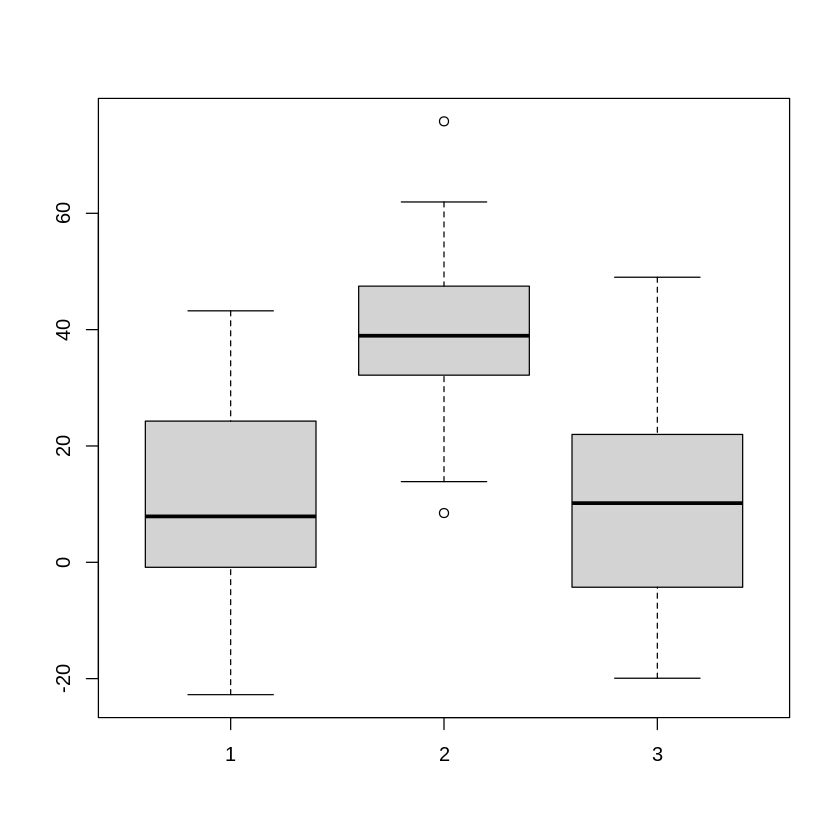

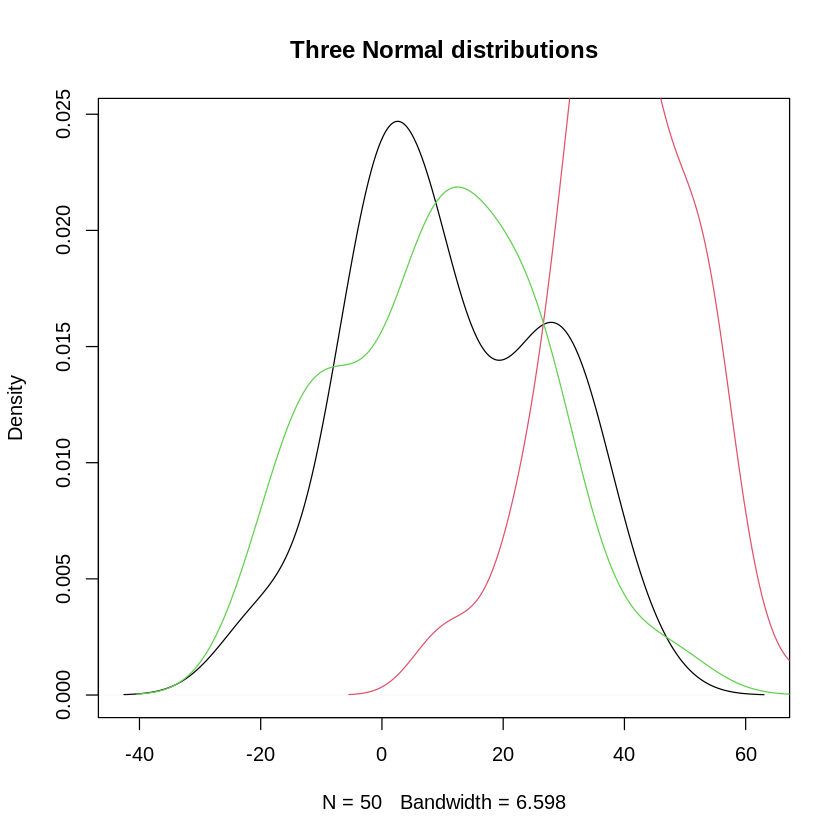

In [440]:
set.seed(5)
d1 = rnorm(50, 10, 15)
d2 = rnorm(50, 40, 15)
d3 = rnorm(50, 10, 15)

boxplot(d1, d2, d3)

plot(density(d1),main="Three Normal distributions")
lines(density(d2),col=2)
lines(density(d3),col=3)

## We want to analyze using an ANOVA if these three populations are different (or not) depending on the parameter selected. Analyze and explain the results obtained. Justify your answers. Remember to test the ANOVA assumptions. What do you expect on the assumptions?

In [441]:
d1n=data.frame(x1=d1, x2="d1")
d2n=data.frame(x1=d2, x2="d2")
d3n=data.frame(x1=d3, x2="d3")


data=mergeRows(d1n, d2n, common.only=FALSE)
data=mergeRows(as.data.frame(data), d3n, common.only=FALSE)
head(data)

,x1,x2
,<dbl>,<chr>
1,-2.6128322,d1
2,30.7653902,d1
3,-8.8323779,d1
4,11.0521415,d1
5,35.6716131,d1
6,0.9563803,d1


             Df Sum Sq Mean Sq F value Pr(>F)    
x2            2  29538   14769   64.99 <2e-16 ***
Residuals   147  33405     227                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message in Boxplot.default(mf[[response]], x, id = list(method = id.method, :
“NAs introduced by coercion”


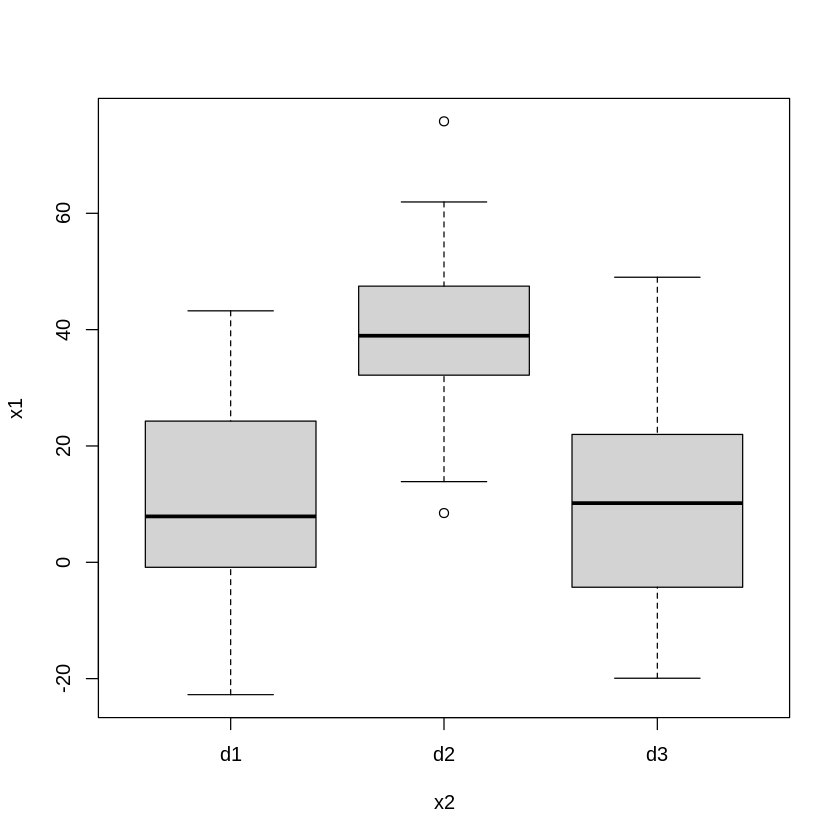

In [442]:
AnovaModel.1 <- aov(x1 ~ x2, data=data)
summary(AnovaModel.1)
Boxplot(x1~x2,data=data,id=FALSE)

As the p-value is less than the significance level 0.05, we can conclude that at least one distribution is different

### ANOVA assumptions:
- For each population, the response variable is normally distributed (checked by Histogram, Q-Q plot or Shapiro-Wilk hypothesis test).


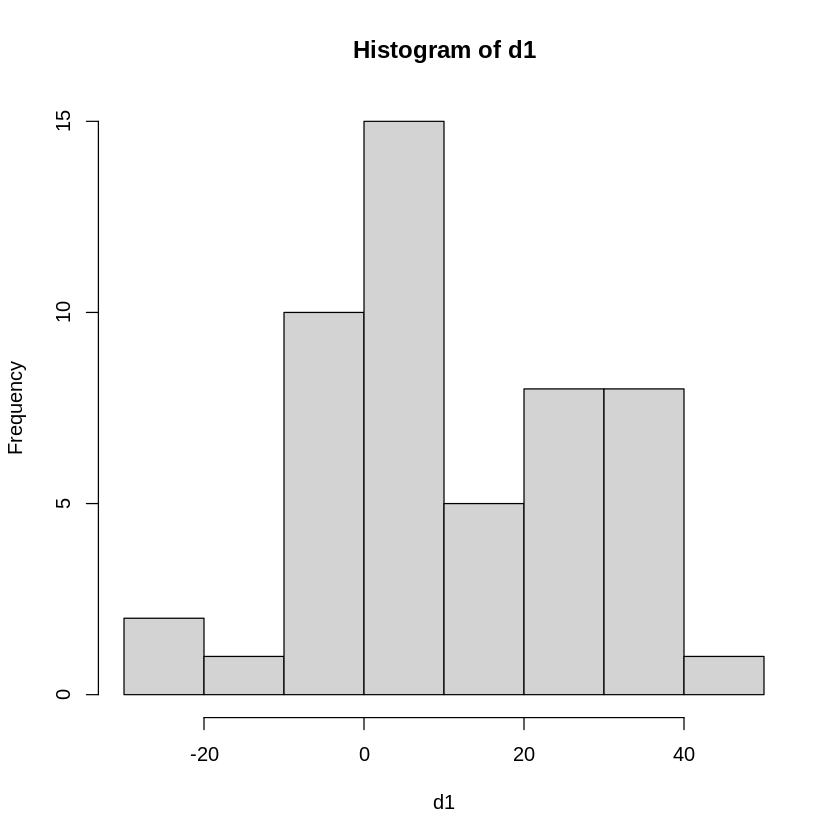

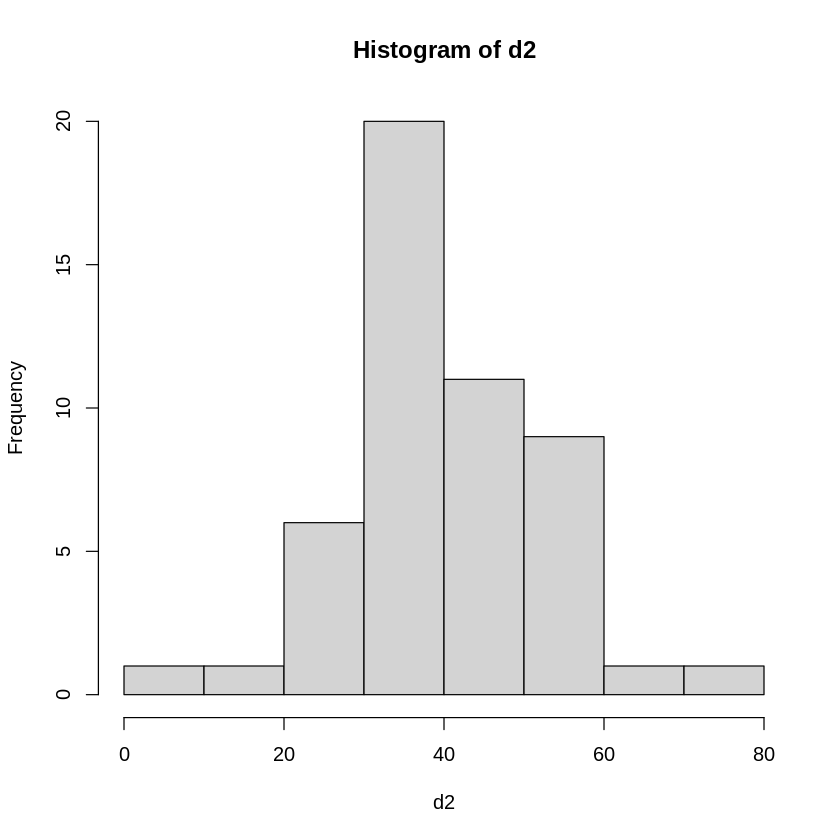

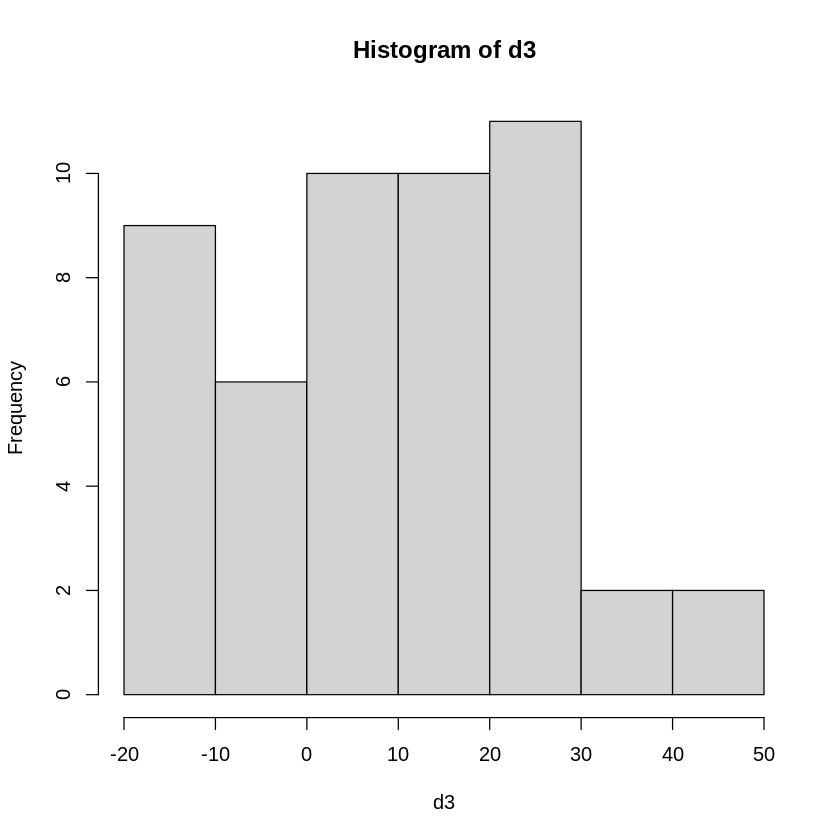

In [443]:
hist(d1)
hist(d2)
hist(d3)

In [444]:
shapiro.test(residuals(AnovaModel.1))


	Shapiro-Wilk normality test

data:  residuals(AnovaModel.1)
W = 0.99309, p-value = 0.69


The p-value is greater than 0.05, the assumption is valid.

- The variance of the response variable is the same for all of the populations (checked by Levene's Test or Breusch Pagan Test). 

In [445]:
bptest(AnovaModel.1)


	studentized Breusch-Pagan test

data:  AnovaModel.1
BP = 5.4666, df = 2, p-value = 0.065


The p-value is greater than 0.05, the assumption is valid.

- The observations must be independent (checked by Durbin Watson test).

In [446]:
dwtest(AnovaModel.1, alternative ="two.sided")


	Durbin-Watson test

data:  AnovaModel.1
DW = 1.9372, p-value = 0.5811
alternative hypothesis: true autocorrelation is not 0


The p-value is greater than 0.05, the assumption is valid.

## We want to analyze if both Age and diabetes affects the risk factors. First categorize age in three groups: <=30 (young), 31-50 (middle age) and 50+ (old).

In [447]:
didata = read.csv("sample_data/diabetes.csv")
head(didata)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [448]:
didataOrg <- didata

didata$AgeCl <- didata$Age

didata$Age[didata$AgeCl <= 30] <- "young"
didata$Age[didata$AgeCl > 30 & didata$AgeCl <= 50] <- "middle age"
didata$Age[didata$AgeCl > 50] <- "old"

didata <- didata[ , ! names(didata) %in% c("AgeCl")] 
head(didata)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>
1,6,148,72,35,0,33.6,0.627,middle age,1
2,1,85,66,29,0,26.6,0.351,middle age,0
3,8,183,64,0,0,23.3,0.672,middle age,1
4,1,89,66,23,94,28.1,0.167,young,0
5,0,137,40,35,168,43.1,2.288,middle age,1
6,5,116,74,0,0,25.6,0.201,young,0


### Questions:
- How does age influence on the risk factors associated with diabetes?

In [449]:
model01 <- aov(Pregnancies~Age, data=didata)
summary.aov(model01)

             Df Sum Sq Mean Sq F value Pr(>F)    
Age           2   3082  1541.2   209.6 <2e-16 ***
Residuals   765   5626     7.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [450]:
model02 <- aov(Glucose~Age, data=didata)
summary.aov(model02)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Age           2  53482   26741      28 1.84e-12 ***
Residuals   765 730582     955                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [451]:
model03 <- aov(BloodPressure~Age, data=didata)
summary.aov(model03)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Age           2  15459    7730   21.75 6.51e-10 ***
Residuals   765 271895     355                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [452]:
model04 <- aov(SkinThickness~Age, data=didata)
summary.aov(model04)

             Df Sum Sq Mean Sq F value  Pr(>F)   
Age           2   2664  1331.8   5.292 0.00522 **
Residuals   765 192517   251.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [453]:
model05 <- aov(Insulin~Age, data=didata)
summary.aov(model05)

             Df   Sum Sq Mean Sq F value Pr(>F)
Age           2    43455   21727   1.639  0.195
Residuals   765 10143210   13259               

In [454]:
model06 <- aov(BMI~Age, data=didata)
summary.aov(model06)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Age           2   1110   555.0   9.118 0.000122 ***
Residuals   765  46567    60.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [455]:
model07 <- aov(DiabetesPedigreeFunction~Age, data=didata)
summary.aov(model07)

             Df Sum Sq Mean Sq F value Pr(>F)  
Age           2   0.57  0.2863   2.618 0.0736 .
Residuals   765  83.63  0.1093                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We were testing the hypothesis that there is no difference in means between groups.
For the tests where this hypothesis was rejected (p-value smaller than 0.05) we can say that tested variable influences Age.

Variables related with age are:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- BMI

Insulin and DiabetesPedigreeFunction variables have no influence on age.

- Which of the risk factors are related with diabetes?

In [456]:
model2 <- aov(Pregnancies~Outcome, data=didata)
summary.aov(model2)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Outcome       1    429   428.8   39.67 5.07e-10 ***
Residuals   766   8280    10.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [457]:
model3 <- aov(Glucose~Outcome, data=didata)
summary.aov(model3)

             Df Sum Sq Mean Sq F value Pr(>F)    
Outcome       1 170689  170689   213.2 <2e-16 ***
Residuals   766 613375     801                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [458]:
model4 <- aov(BloodPressure~Outcome, data=didata)
summary.aov(model4)

             Df Sum Sq Mean Sq F value Pr(>F)  
Outcome       1   1217  1216.6   3.257 0.0715 .
Residuals   766 286138   373.5                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [459]:
model5 <- aov(SkinThickness~Outcome, data=didata)
summary.aov(model5)

             Df Sum Sq Mean Sq F value Pr(>F)  
Outcome       1   1091  1090.7   4.304 0.0383 *
Residuals   766 194090   253.4                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [460]:
model6 <- aov(Insulin~Outcome, data=didata)
summary.aov(model6)

             Df   Sum Sq Mean Sq F value   Pr(>F)    
Outcome       1   173609  173609   13.28 0.000286 ***
Residuals   766 10013056   13072                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [461]:
model7 <- aov(BMI~Outcome, data=didata)
summary.aov(model7)

             Df Sum Sq Mean Sq F value Pr(>F)    
Outcome       1   4084    4084   71.77 <2e-16 ***
Residuals   766  43592      57                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [462]:
model8 <- aov(DiabetesPedigreeFunction~Outcome, data=didata)
summary.aov(model8)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Outcome       1   2.54  2.5447   23.87 1.25e-06 ***
Residuals   766  81.66  0.1066                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We were testing the hypothesis that there is no difference in means between groups.
For the tests where this hypothesis was rejected we can say that the tested variable is related with diabetes.
 
Variables related with diabetes are:
- Pregnancies
- Glucose
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
 
Only the BloodPressure variable is not related.



- Detail the results of Two-Way ANOVA considering “Blood Pressure” as dependent 
variable, and the age groups and the indicator of diabetes as independent variables. Analyze the interaction term of two factors.

In [463]:
model20 <- aov(BloodPressure~Age * Outcome, data=didata)
summary.aov(model20)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Age           2  15459    7730  21.735 6.61e-10 ***
Outcome       1      3       3   0.007    0.931    
Age:Outcome   2    904     452   1.271    0.281    
Residuals   762 270988     356                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### ANOVA assumptions

#### The observations within each sample must be independent (Durbin Watson).

In [464]:
dwtest(model20, alternative ="two.sided")


	Durbin-Watson test

data:  model20
DW = 1.9684, p-value = 0.6611
alternative hypothesis: true autocorrelation is not 0


#### The populations from which the samples are selected must be normal (Shapiro test).

In [465]:
shapiro.test(residuals(model20))


	Shapiro-Wilk normality test

data:  residuals(model20)
W = 0.81264, p-value < 2.2e-16


#### The populations from which the samples are selected must have equal variances (Breusch Pagan test)


In [466]:
bptest(model20)


	studentized Breusch-Pagan test

data:  model20
BP = 9.7546, df = 5, p-value = 0.0825


The normality assumption is not valid but it's the least important assumption.

There is no interaction. Age:Outcome score is not significant. 

We received only significant score for Age variable what means that Age is related with BloodPressure

- Analyze the distribution of Insulin variable. What would you recommend to fit an ANOVA model on Insulin levels?

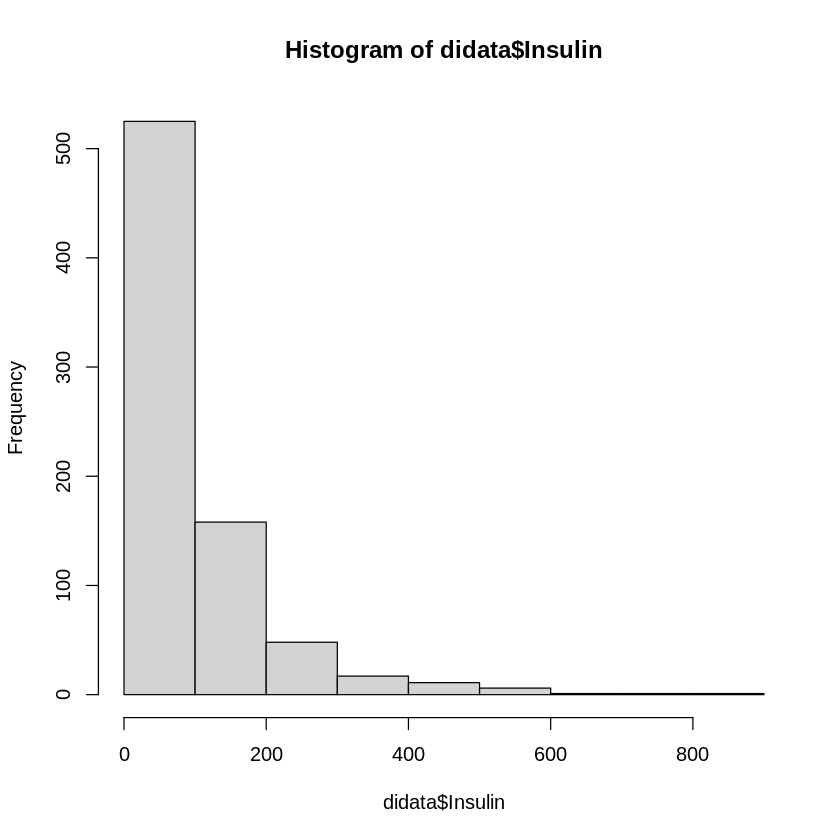

In [467]:
hist(didata$Insulin)

I would recommend checking the dataset and removing errors and outliers. The distribution should be more similar to Normal distribution.

# THIRD QUESTION: DEFINE A LINEAR MODEL FOR AN ATHLETE IN THE 1500 M

In [468]:
data(decathlon)
colnames(decathlon)
head(decathlon)

[1] "100m"        "Long.jump"   "Shot.put"    "High.jump"   "400m"       
 [6] "110m.hurdle" "Discus"      "Pole.vault"  "Javeline"    "1500m"      
[11] "Rank"        "Points"      "Competition"

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


In [469]:
colnames(decathlon)[c(1,5,6,10)]<-c("X100m","X400m", "X110m.hurdle", "X1500m")

In [470]:
sum(decathlon$Competition == "Decastar")
decathlon$Competition = as.numeric(decathlon$Competition) - 1
sum(decathlon$Competition == 0)
decathlon <- decathlon[ , ! names(decathlon) %in% c("X", "Rank", "Points")]
head(decathlon)

[1] 13

[1] 13

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,0
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,0
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,0
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,0
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,0
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,0


## Split data into train and test set

In [471]:
## 80% of the sample size
smp_size <- floor(0.80 * nrow(decathlon))
set.seed(123)
train_ind <- sample(seq_len(nrow(decathlon)), size = smp_size)

train <- decathlon[train_ind, ]
test <- decathlon[-train_ind, ]

In [472]:
head(train)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Qi,11.06,7.34,13.55,1.97,49.65,14.78,45.13,4.50,60.79,272.63,1
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,1
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,0
Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.50,58.36,263.08,1
Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.70,53.05,317.00,1


In [473]:
head(test)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,0
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,0
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,0
BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,0
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,1
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,1


In [474]:
nrow(train)
nrow(test)

[1] 32

[1] 9

In [475]:
summary(train$'X1500m')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  262.1   269.7   276.4   277.9   282.0   317.0 

In [476]:
cor(train)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
X100m,1.00000000,-0.52134973,-0.2627119616,-0.23587487,0.4088559444,0.545143837,-0.091352867,-0.154121562,-0.21248744,-0.08426214,-0.481395875
Long.jump,-0.52134973,1.00000000,0.0486792618,0.24381627,-0.5135304032,-0.418967338,0.133320844,0.243572171,0.20070031,-0.06751825,0.012239361
Shot.put,-0.26271196,0.04867926,1.0000000000,0.43053689,-0.0002454305,-0.164037570,0.659824224,0.113504943,0.44830796,0.17802405,0.214089842
High.jump,-0.23587487,0.24381627,0.4305368923,1.00000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,0.21624943,0.03098685,-0.130304004
X400m,0.40885594,-0.51353040,-0.0002454305,-0.12727997,1.0000000000,0.484934084,0.038254448,-0.171549495,-0.05122006,0.45152497,0.099936384
X110m.hurdle,0.54514384,-0.41896734,-0.1640375704,-0.22904930,0.4849340840,1.000000000,-0.183470500,0.006784294,-0.05430533,0.03565826,-0.138124544
Discus,-0.09135287,0.13332084,0.6598242236,0.41655363,0.0382544484,-0.183470500,1.000000000,-0.152201432,0.16551055,0.26520102,-0.009947658
Pole.vault,-0.15412156,0.24357217,0.1135049425,-0.16765793,-0.1715494953,0.006784294,-0.152201432,1.000000000,0.01037601,0.17617666,-0.065460176
Javeline,-0.21248744,0.20070031,0.4483079586,0.21624943,-0.0512200619,-0.054305326,0.165510548,0.010376009,1.00000000,-0.22823268,0.250929825
X1500m,-0.08426214,-0.06751825,0.1780240511,0.03098685,0.4515249674,0.035658259,0.265201018,0.176176660,-0.22823268,1.00000000,-0.026414728


In [477]:
#Changing direction of some variables
train$'X100m' <- max(train$'X100m') - train$'X100m'
train$'Long.jump' <- max(train$'Long.jump') - train$'Long.jump'
train$'Javeline' <- max(train$'Javeline') - train$'Javeline'

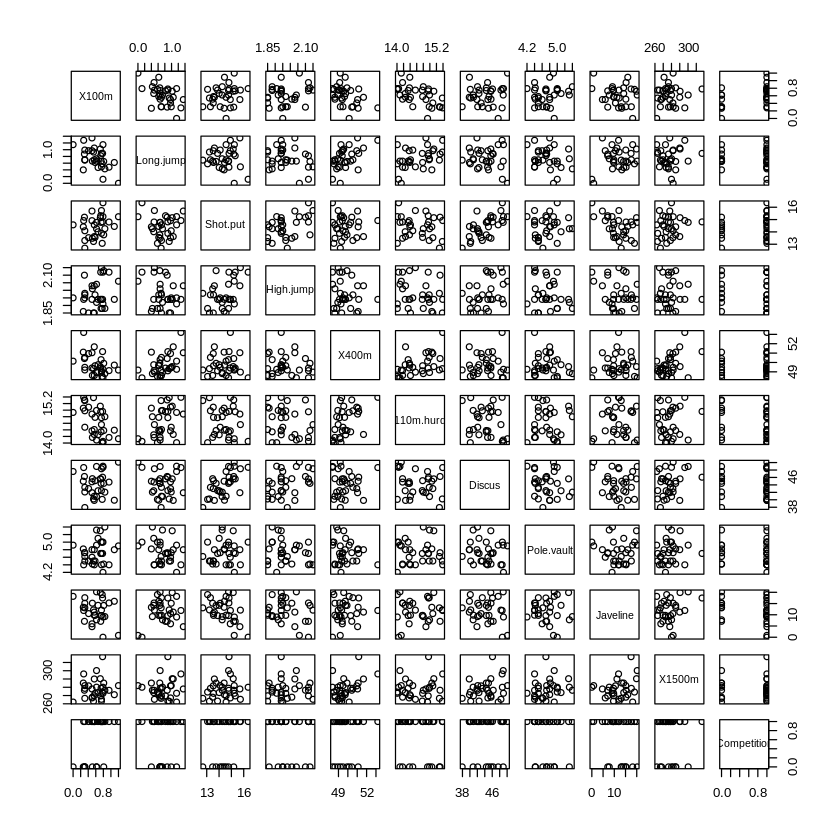

In [478]:
plot(train)

In [479]:
cor(train)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
X100m,1.00000000,-0.52134973,0.2627119616,0.23587487,-0.4088559444,-0.545143837,0.091352867,0.154121562,-0.21248744,0.08426214,0.481395875
Long.jump,-0.52134973,1.00000000,-0.0486792618,-0.24381627,0.5135304032,0.418967338,-0.133320844,-0.243572171,0.20070031,0.06751825,-0.012239361
Shot.put,0.26271196,-0.04867926,1.0000000000,0.43053689,-0.0002454305,-0.164037570,0.659824224,0.113504943,-0.44830796,0.17802405,0.214089842
High.jump,0.23587487,-0.24381627,0.4305368923,1.00000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,-0.21624943,0.03098685,-0.130304004
X400m,-0.40885594,0.51353040,-0.0002454305,-0.12727997,1.0000000000,0.484934084,0.038254448,-0.171549495,0.05122006,0.45152497,0.099936384
X110m.hurdle,-0.54514384,0.41896734,-0.1640375704,-0.22904930,0.4849340840,1.000000000,-0.183470500,0.006784294,0.05430533,0.03565826,-0.138124544
Discus,0.09135287,-0.13332084,0.6598242236,0.41655363,0.0382544484,-0.183470500,1.000000000,-0.152201432,-0.16551055,0.26520102,-0.009947658
Pole.vault,0.15412156,-0.24357217,0.1135049425,-0.16765793,-0.1715494953,0.006784294,-0.152201432,1.000000000,-0.01037601,0.17617666,-0.065460176
Javeline,-0.21248744,0.20070031,-0.4483079586,-0.21624943,0.0512200619,0.054305326,-0.165510548,-0.010376009,1.00000000,0.22823268,-0.250929825
X1500m,0.08426214,0.06751825,0.1780240511,0.03098685,0.4515249674,0.035658259,0.265201018,0.176176660,0.22823268,1.00000000,-0.026414728


We are having only positive correlation with the result for 1500m.
 
The highest correlation with 1500m is for 400m, so we will create simple linear regression with this feature.


Warning message in applyDefaults(regLine, defaults = list(method = lm, lty = 1, :
“unnamed  arguments, will be ignored”


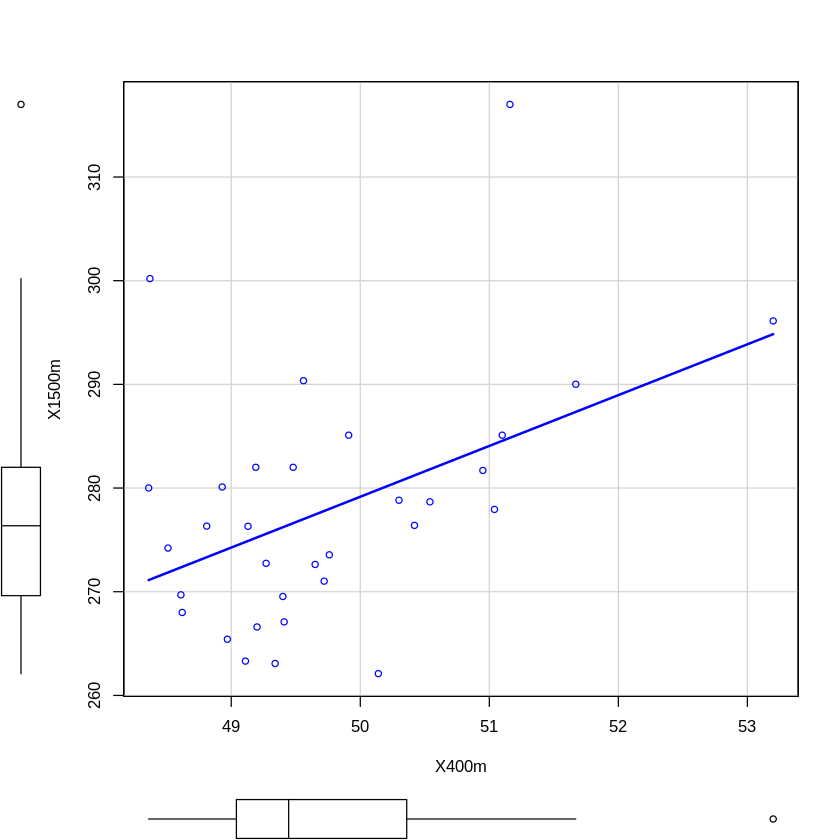

In [480]:
scatterplot(X1500m ~ X400m, regLine=lm, smooth=FALSE, data=train)

In [481]:
reg_model1<-lm(X1500m~ X400m, data=train)
summary(reg_model1)


Call:
lm(formula = X1500m ~ X400m, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.749  -6.411  -2.385   3.596  32.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   34.105     87.982   0.388  0.70102   
X400m          4.901      1.768   2.772  0.00949 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.66 on 30 degrees of freedom
Multiple R-squared:  0.2039,	Adjusted R-squared:  0.1773 
F-statistic: 7.683 on 1 and 30 DF,  p-value: 0.009485


We can see that the decathlon$"400m" was marked by two stars. That means that variable is significant but not very strong (we didn't receive three stars, which is a maximum).
 
The Residual standard error is equal 10.66, comparing it to the mean of the decathlon"1500m" (the variable we want to predict) which is equal to 277.9, we can say that the model is already relatively (quite) good.
The Multiple R-squared is equal to 0.2039 which means that 20% of the variation of the response variable can be explained by using the decathlon$"400m" variable as the independent variable.


In [482]:
reg_model1$coefficients

(Intercept)       X400m 
   34.10490     4.90116

## Multiple Linear Regression Model

In [483]:
RegModel.1 <-lm(X1500m ~ X400m + X100m + Long.jump + Shot.put + High.jump + X110m.hurdle + Discus + Pole.vault + Javeline + Competition, data=train)
summary(RegModel.1)


Call:
lm(formula = X1500m ~ X400m + X100m + Long.jump + Shot.put + 
    High.jump + X110m.hurdle + Discus + Pole.vault + Javeline + 
    Competition, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3823  -3.4460  -0.2813   3.6758  21.2280 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -174.3305   121.2106  -1.438  0.16510   
X400m           7.7429     2.1107   3.668  0.00143 **
X100m          20.9493    11.2484   1.862  0.07660 . 
Long.jump      -0.9703     8.2885  -0.117  0.90792   
Shot.put        1.2087     3.6820   0.328  0.74594   
High.jump      -9.8716    24.8265  -0.398  0.69492   
X110m.hurdle   -1.7192     5.1623  -0.333  0.74241   
Discus          0.8561     0.8466   1.011  0.32341   
Pole.vault      8.7085     7.1380   1.220  0.23598   
Javeline        0.6821     0.4153   1.642  0.11543   
Competition    -6.8212     5.3146  -1.283  0.21330   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Only 400m and (a little bit) 100m results seem to be significant. 

We can check if we meet assumptions

## Assumptions

### Normality

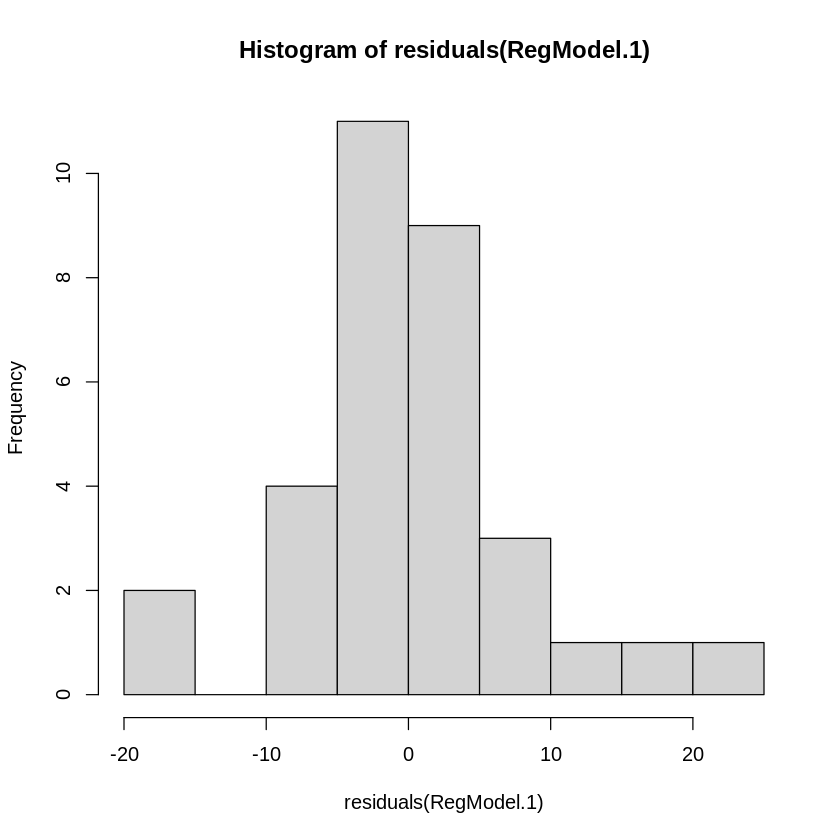

In [484]:
hist(residuals(RegModel.1))

In [485]:
shapiro.test(residuals(RegModel.1))


	Shapiro-Wilk normality test

data:  residuals(RegModel.1)
W = 0.96362, p-value = 0.3439


We accept the H0 hypothesis (p-value higher than 0.05). The error term follows a Normal distribution. The normality assumption is valid.

### Homogenity of Variance

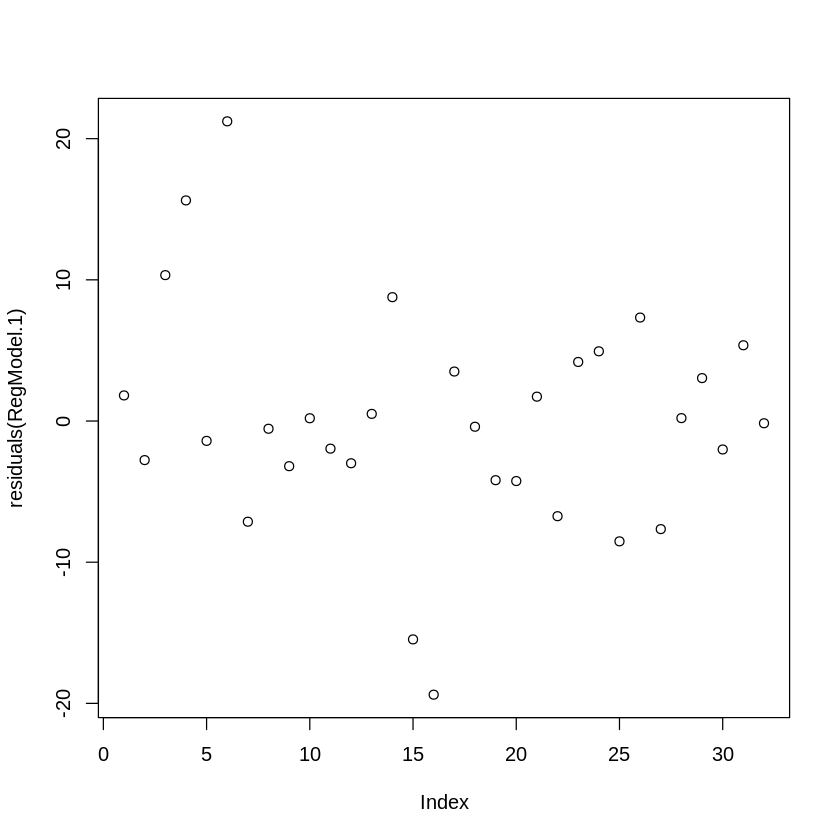

In [486]:
plot(residuals(RegModel.1))

In [487]:
bptest(RegModel.1)


	studentized Breusch-Pagan test

data:  RegModel.1
BP = 10.496, df = 10, p-value = 0.3981


We accept the H0 hypothesis as the p-value is higher than 0.05. The hypothesis is about homogeneity of variance.

### The independence of errors

In [488]:
dwtest(RegModel.1, alternative = "two.sided")


	Durbin-Watson test

data:  RegModel.1
DW = 2.1561, p-value = 0.6798
alternative hypothesis: true autocorrelation is not 0


There are no autocorrelations in the dataset.
 
H0 is accepted as p-value is higher than 0.05.
 
The errors are independent


### Multicollinearity

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,Competition
X100m,1.00000000,-0.52134973,0.2627119616,0.2358749,-0.4088559444,-0.545143837,0.091352867,0.154121562,-0.21248744,0.481395875
Long.jump,-0.52134973,1.00000000,-0.0486792618,-0.2438163,0.5135304032,0.418967338,-0.133320844,-0.243572171,0.20070031,-0.012239361
Shot.put,0.26271196,-0.04867926,1.0000000000,0.4305369,-0.0002454305,-0.164037570,0.659824224,0.113504943,-0.44830796,0.214089842
High.jump,0.23587487,-0.24381627,0.4305368923,1.0000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,-0.21624943,-0.130304004
X400m,-0.40885594,0.51353040,-0.0002454305,-0.1272800,1.0000000000,0.484934084,0.038254448,-0.171549495,0.05122006,0.099936384
X110m.hurdle,-0.54514384,0.41896734,-0.1640375704,-0.2290493,0.4849340840,1.000000000,-0.183470500,0.006784294,0.05430533,-0.138124544
Discus,0.09135287,-0.13332084,0.6598242236,0.4165536,0.0382544484,-0.183470500,1.000000000,-0.152201432,-0.16551055,-0.009947658
Pole.vault,0.15412156,-0.24357217,0.1135049425,-0.1676579,-0.1715494953,0.006784294,-0.152201432,1.000000000,-0.01037601,-0.065460176
Javeline,-0.21248744,0.20070031,-0.4483079586,-0.2162494,0.0512200619,0.054305326,-0.165510548,-0.010376009,1.00000000,-0.250929825
Competition,0.48139587,-0.01223936,0.2140898420,-0.1303040,0.0999363837,-0.138124544,-0.009947658,-0.065460176,-0.25092982,1.000000000


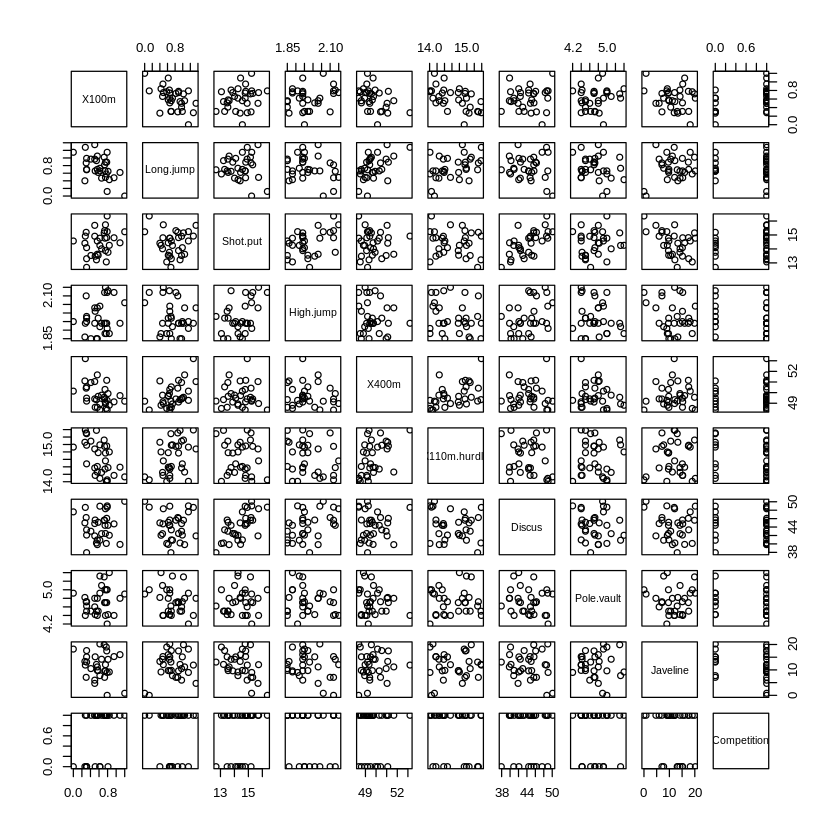

In [489]:
output <- which(colnames(train) == "X1500m")
plot(train[,-output])
cor(train[,-output])

We can see a correlation between Shot.put and Discus.
 
The highly correlated variables can affect results. So we need to delete one of the correlated variables.


In [490]:
vif(RegModel.1)

X400m        X100m    Long.jump     Shot.put    High.jump X110m.hurdle 
    1.746544     2.783804     2.133361     3.377432     1.704990     1.739383 
      Discus   Pole.vault     Javeline  Competition 
    2.473659     1.513441     1.492236     1.971213

Shot.put variable has the highest vif score, so that is the variable we should delete at the beginning.

## New Multiple Linear Regression

In [491]:
RegModel.2 <-lm(X1500m ~ X400m + X100m + Long.jump + High.jump + X110m.hurdle + Discus + Pole.vault + Javeline + Competition, data=train)
summary(RegModel.2)


Call:
lm(formula = X1500m ~ X400m + X100m + Long.jump + High.jump + 
    X110m.hurdle + Discus + Pole.vault + Javeline + Competition, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4759  -3.3426  -0.4669   3.3364  21.5818 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -173.23376  118.68218  -1.460  0.15852   
X400m           7.69448    2.06238   3.731  0.00116 **
X100m          21.36551   10.94777   1.952  0.06383 . 
Long.jump       0.07842    7.49140   0.010  0.99174   
High.jump      -7.22619   23.00127  -0.314  0.75636   
X110m.hurdle   -1.75596    5.05535  -0.347  0.73163   
Discus          1.04860    0.59831   1.753  0.09360 . 
Pole.vault      9.75740    6.25223   1.561  0.13288   
Javeline        0.62156    0.36452   1.705  0.10225   
Competition    -6.47193    5.10030  -1.269  0.21773   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.43 on 22 degrees of freedom

## Checking assumptions for the new model

### Normality

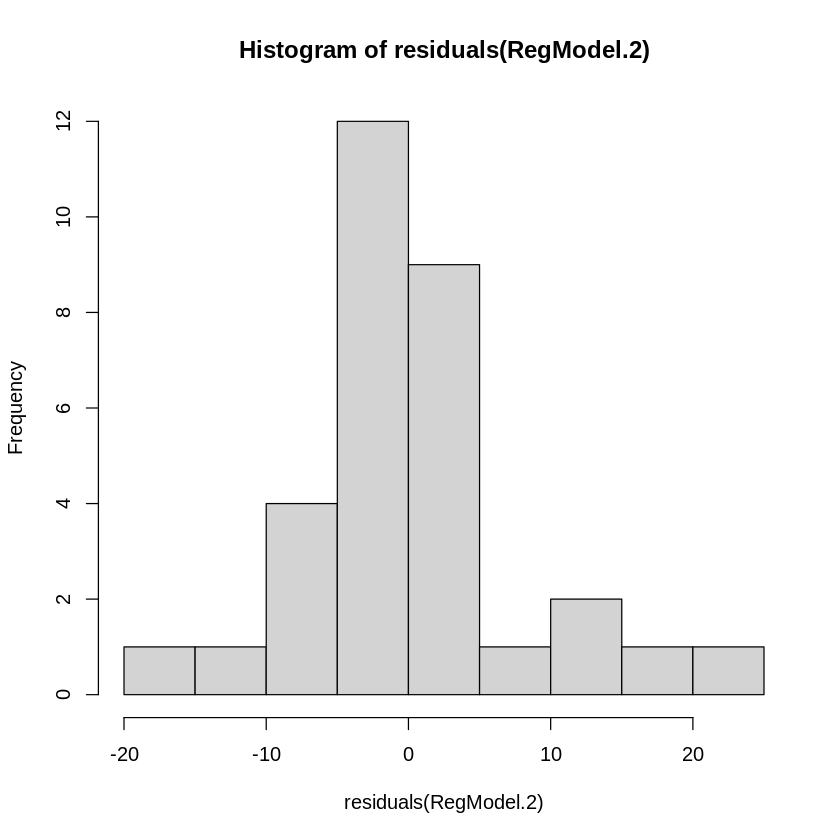

In [492]:
hist(residuals(RegModel.2))

In [493]:
shapiro.test(residuals(RegModel.2))


	Shapiro-Wilk normality test

data:  residuals(RegModel.2)
W = 0.95948, p-value = 0.2659


We accept H0 hypothesis (p-value higher than 0.05). The error term follows a Normal distribution. The normality assumption is valid.

### Homogenity of Variance

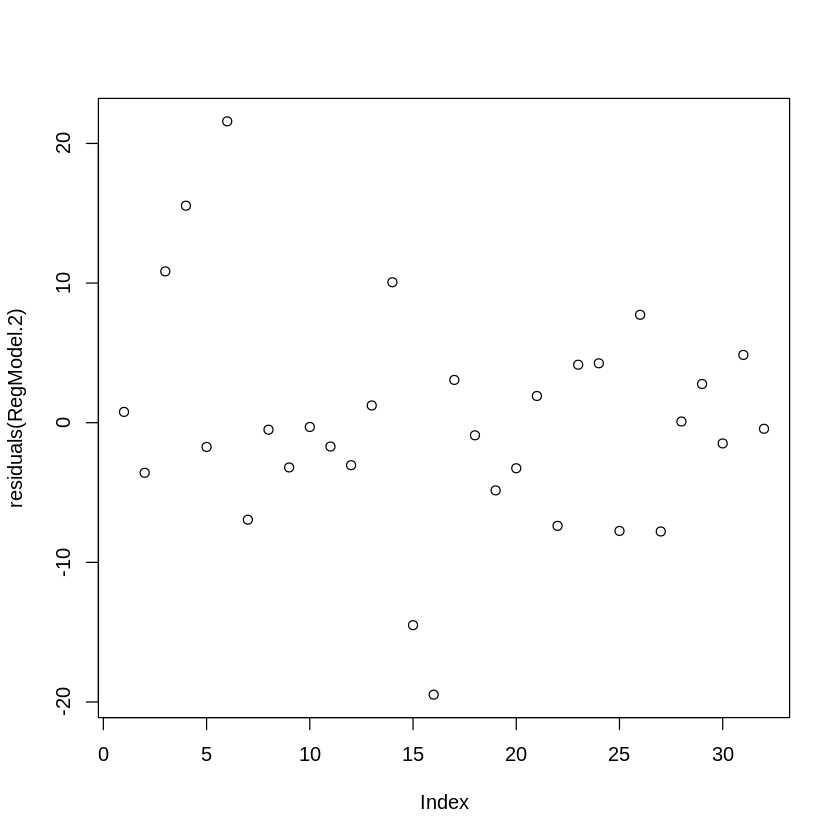

In [494]:
plot(residuals(RegModel.2))

In [495]:
bptest(RegModel.2)


	studentized Breusch-Pagan test

data:  RegModel.2
BP = 8.0252, df = 9, p-value = 0.5316


We accept the H0 hypothesis as the p-value is higher than 0.05. The hypothesis is about homogeneity of variance.

### The independence of errors

In [496]:
dwtest(RegModel.2, alternative = "two.sided")


	Durbin-Watson test

data:  RegModel.2
DW = 2.1766, p-value = 0.5921
alternative hypothesis: true autocorrelation is not 0


There are no autocorrelations in the dataset. 

H0 is accepted as p-value is higher than 0.05.

The errors are independent

### Multicollinearity

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,Competition
X100m,1.00000000,-0.52134973,0.2627119616,0.2358749,-0.4088559444,-0.545143837,0.091352867,0.154121562,-0.21248744,0.481395875
Long.jump,-0.52134973,1.00000000,-0.0486792618,-0.2438163,0.5135304032,0.418967338,-0.133320844,-0.243572171,0.20070031,-0.012239361
Shot.put,0.26271196,-0.04867926,1.0000000000,0.4305369,-0.0002454305,-0.164037570,0.659824224,0.113504943,-0.44830796,0.214089842
High.jump,0.23587487,-0.24381627,0.4305368923,1.0000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,-0.21624943,-0.130304004
X400m,-0.40885594,0.51353040,-0.0002454305,-0.1272800,1.0000000000,0.484934084,0.038254448,-0.171549495,0.05122006,0.099936384
X110m.hurdle,-0.54514384,0.41896734,-0.1640375704,-0.2290493,0.4849340840,1.000000000,-0.183470500,0.006784294,0.05430533,-0.138124544
Discus,0.09135287,-0.13332084,0.6598242236,0.4165536,0.0382544484,-0.183470500,1.000000000,-0.152201432,-0.16551055,-0.009947658
Pole.vault,0.15412156,-0.24357217,0.1135049425,-0.1676579,-0.1715494953,0.006784294,-0.152201432,1.000000000,-0.01037601,-0.065460176
Javeline,-0.21248744,0.20070031,-0.4483079586,-0.2162494,0.0512200619,0.054305326,-0.165510548,-0.010376009,1.00000000,-0.250929825
Competition,0.48139587,-0.01223936,0.2140898420,-0.1303040,0.0999363837,-0.138124544,-0.009947658,-0.065460176,-0.25092982,1.000000000


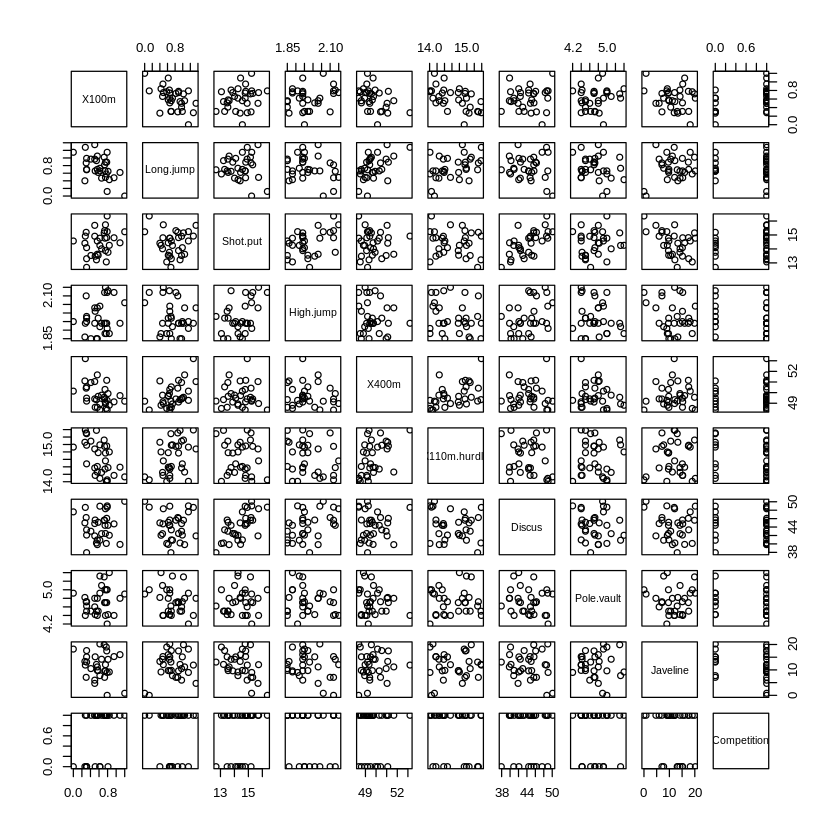

In [497]:
output <- which(colnames(train) == "X1500m")
plot(train[,-output])
cor(train[,-output])

In [498]:
vif(RegModel.2)

X400m        X100m    Long.jump    High.jump X110m.hurdle       Discus 
    1.738017     2.748439     1.816442     1.525372     1.738565     1.287629 
  Pole.vault     Javeline  Competition 
    1.210207     1.197937     1.892215

In [499]:
step(RegModel.2)

Start:  AIC=151.62
X1500m ~ X400m + X100m + Long.jump + High.jump + X110m.hurdle + 
    Discus + Pole.vault + Javeline + Competition

               Df Sum of Sq    RSS    AIC
- Long.jump     1      0.01 1956.4 149.62
- High.jump     1      8.78 1965.2 149.76
- X110m.hurdle  1     10.73 1967.2 149.79
<none>                      1956.4 151.62
- Competition   1    143.19 2099.6 151.88
- Pole.vault    1    216.59 2173.0 152.98
- Javeline      1    258.56 2215.0 153.59
- Discus        1    273.15 2229.6 153.80
- X100m         1    338.70 2295.1 154.73
- X400m         1   1237.83 3194.3 165.31

Step:  AIC=149.62
X1500m ~ X400m + X100m + High.jump + X110m.hurdle + Discus + 
    Pole.vault + Javeline + Competition

               Df Sum of Sq    RSS    AIC
- High.jump     1      8.83 1965.3 147.76
- X110m.hurdle  1     10.74 1967.2 147.80
<none>                      1956.4 149.62
- Competition   1    147.00 2103.4 149.94
- Pole.vault    1    223.04 2179.5 151.07
- Javeline      1    264.74 22


Call:
lm(formula = X1500m ~ X400m + X100m + Discus + Pole.vault + Javeline + 
    Competition, data = train)

Coefficients:
(Intercept)        X400m        X100m       Discus   Pole.vault     Javeline  
  -201.0539       7.4434      21.6470       1.0198       9.9059       0.6564  
Competition  
    -5.9655  


The lowest AIC value the better. From the output of step() function we can see actual AIC score and AIC score when each variable will be deleted. Step by step we are deleting the variables to receive a model with as low AIC score as possible. When we see that deleting more variables will increase the AIC score we know that we already found the best multiple linear model.

## Third - final model

In [500]:
RegModel.3 <-lm(X1500m ~ X400m + X100m + Discus + Pole.vault + Javeline + Competition, data=train)
summary(RegModel.3)


Call:
lm(formula = X1500m ~ X400m + X100m + Discus + Pole.vault + Javeline + 
    Competition, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2804  -3.5023  -0.2449   2.8593  21.3204 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -201.0539    95.4272  -2.107 0.045331 *  
X400m          7.4434     1.7553   4.241 0.000267 ***
X100m         21.6470     8.5806   2.523 0.018377 *  
Discus         1.0198     0.5190   1.965 0.060621 .  
Pole.vault     9.9059     5.5964   1.770 0.088914 .  
Javeline       0.6564     0.3312   1.982 0.058612 .  
Competition   -5.9655     4.4443  -1.342 0.191573    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.89 on 25 degrees of freedom
Multiple R-squared:  0.5386,	Adjusted R-squared:  0.4278 
F-statistic: 4.863 on 6 and 25 DF,  p-value: 0.002038


## Checking assumptions for the final model

### Normality

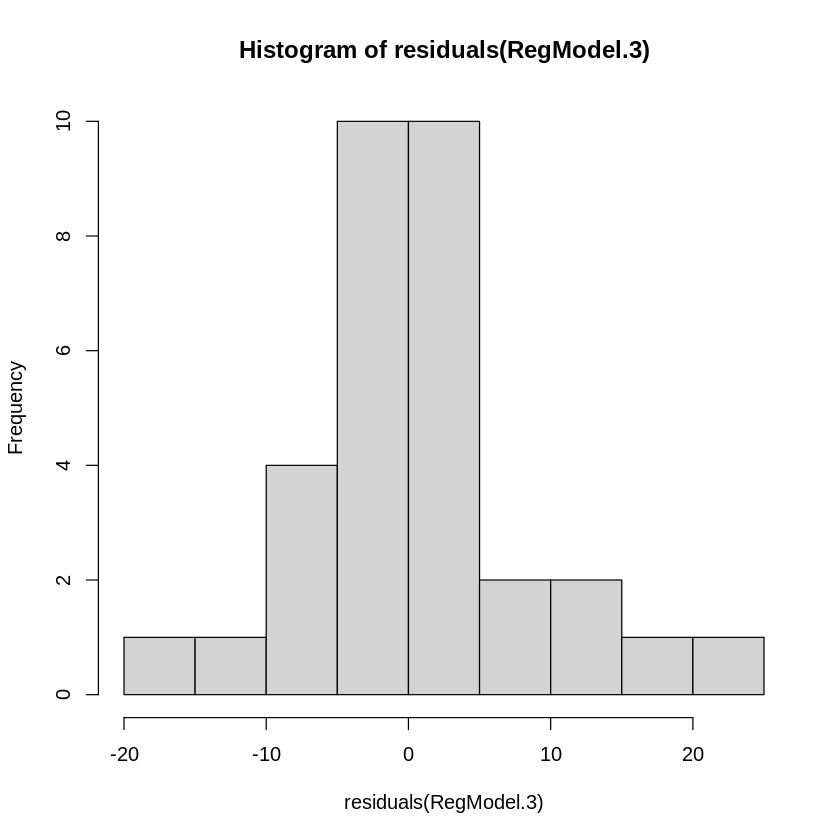

In [501]:
hist(residuals(RegModel.3))

In [502]:
shapiro.test(residuals(RegModel.3))


	Shapiro-Wilk normality test

data:  residuals(RegModel.3)
W = 0.95868, p-value = 0.2526


We accept the H0 hypothesis (p-value higher than 0.05). The error term follows a Normal distribution. The normality assumption is valid.

### Homogenity of Variance

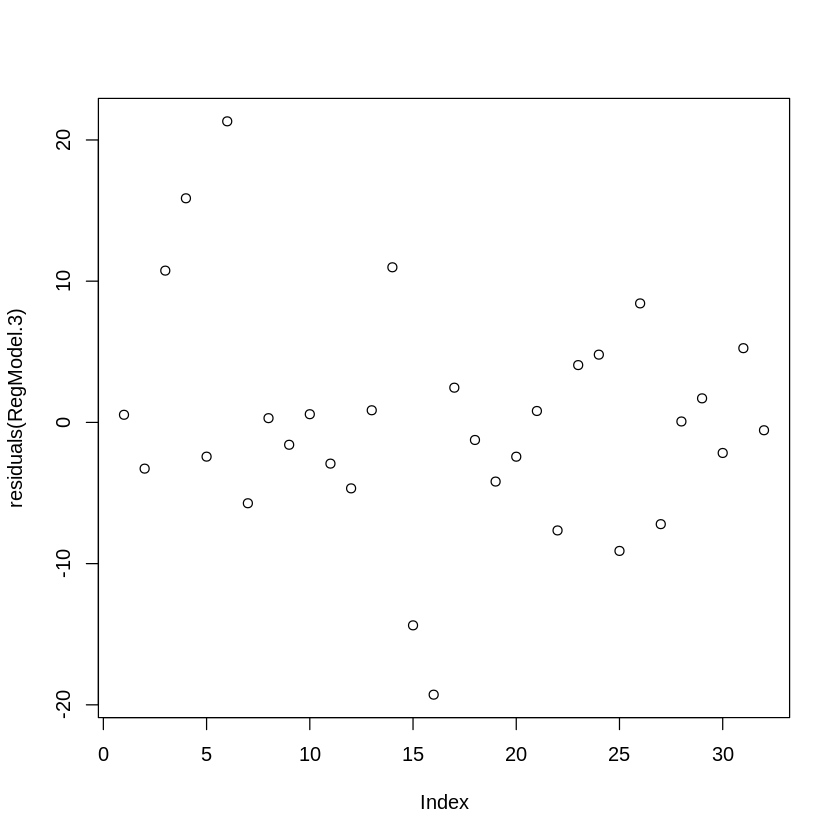

In [503]:
plot(residuals(RegModel.3))

In [504]:
bptest(RegModel.3)


	studentized Breusch-Pagan test

data:  RegModel.3
BP = 7.3562, df = 6, p-value = 0.2892


We accept the H0 hypothesis as the p-value is higher than 0.05. The hypothesis is about homogeneity of variance.

### The independence of errors

In [505]:
dwtest(RegModel.3, alternative = "two.sided")


	Durbin-Watson test

data:  RegModel.3
DW = 2.2015, p-value = 0.4967
alternative hypothesis: true autocorrelation is not 0


There are no autocorrelations in the dataset.

H0 is accepted as p-value is higher than 0.05.

The errors are independent

### Multicollinearity

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,Competition
X100m,1.00000000,-0.52134973,0.2627119616,0.2358749,-0.4088559444,-0.545143837,0.091352867,0.154121562,-0.21248744,0.481395875
Long.jump,-0.52134973,1.00000000,-0.0486792618,-0.2438163,0.5135304032,0.418967338,-0.133320844,-0.243572171,0.20070031,-0.012239361
Shot.put,0.26271196,-0.04867926,1.0000000000,0.4305369,-0.0002454305,-0.164037570,0.659824224,0.113504943,-0.44830796,0.214089842
High.jump,0.23587487,-0.24381627,0.4305368923,1.0000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,-0.21624943,-0.130304004
X400m,-0.40885594,0.51353040,-0.0002454305,-0.1272800,1.0000000000,0.484934084,0.038254448,-0.171549495,0.05122006,0.099936384
X110m.hurdle,-0.54514384,0.41896734,-0.1640375704,-0.2290493,0.4849340840,1.000000000,-0.183470500,0.006784294,0.05430533,-0.138124544
Discus,0.09135287,-0.13332084,0.6598242236,0.4165536,0.0382544484,-0.183470500,1.000000000,-0.152201432,-0.16551055,-0.009947658
Pole.vault,0.15412156,-0.24357217,0.1135049425,-0.1676579,-0.1715494953,0.006784294,-0.152201432,1.000000000,-0.01037601,-0.065460176
Javeline,-0.21248744,0.20070031,-0.4483079586,-0.2162494,0.0512200619,0.054305326,-0.165510548,-0.010376009,1.00000000,-0.250929825
Competition,0.48139587,-0.01223936,0.2140898420,-0.1303040,0.0999363837,-0.138124544,-0.009947658,-0.065460176,-0.25092982,1.000000000


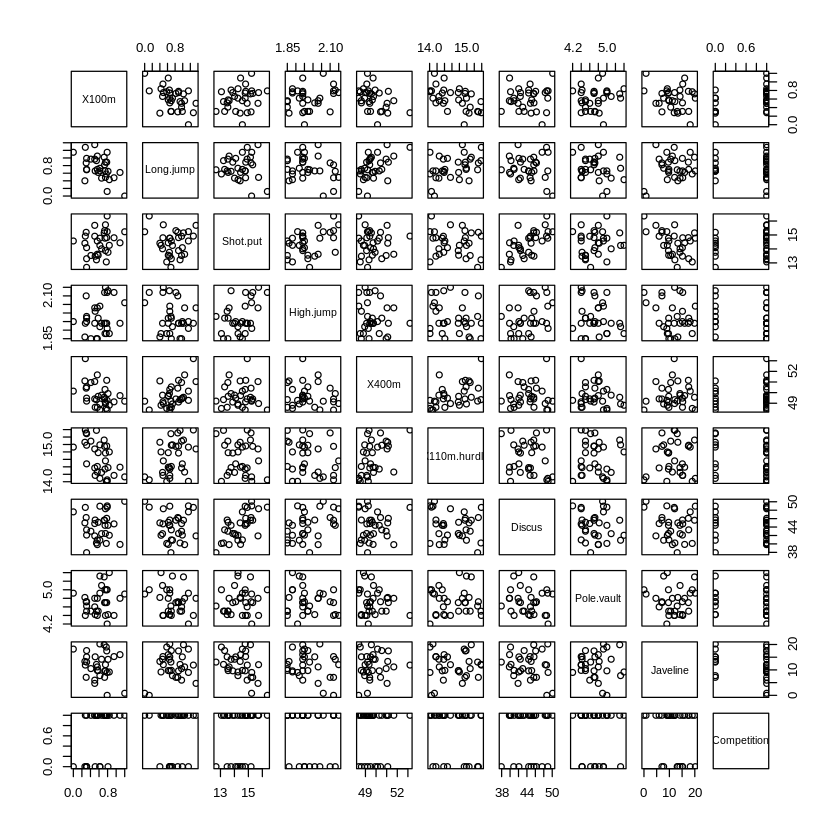

In [506]:
output <- which(colnames(train) == "X1500m")
plot(train[,-output])
cor(train[,-output])

In [507]:
vif(RegModel.3)

X400m       X100m      Discus  Pole.vault    Javeline Competition 
   1.416722    1.899995    1.090296    1.091155    1.113174    1.616866

## Prediction on the test set

### Preprocessing

We have to revert variables that are used in the model and were reverted to train the model.

In [508]:
#Changing direction of some variables
test$'X100m' <- max(test$'X100m') - test$'X100m'
test$'Javeline' <- max(test$'Javeline') - test$'Javeline'

In [509]:
train

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Qi,0.58,0.62,13.55,1.97,49.65,14.78,45.13,4.50,9.73,272.63,1
Clay,1.20,0.00,15.23,2.06,49.19,14.13,50.11,4.90,0.81,282.00,1
Sebrle,0.79,0.12,16.36,2.12,48.36,14.05,48.72,5.00,0.00,280.01,1
KARPOV,0.62,0.66,14.77,2.04,48.37,14.09,48.95,4.92,20.21,300.20,0
Lorenzo,0.54,0.93,13.22,1.85,49.34,15.38,40.22,4.50,12.16,263.08,1
Korkizoglou,0.78,0.89,14.81,1.94,51.16,14.96,46.07,4.70,17.47,317.00,1
Schoenbeck,0.74,0.66,14.77,1.88,50.30,14.34,44.41,5.00,9.63,278.82,1
Barras,0.50,0.97,14.91,1.94,49.41,14.37,44.83,4.60,5.97,267.09,1
Smith,0.79,1.15,15.24,1.91,49.27,14.01,49.02,4.20,9.00,272.74,1


In [510]:
test

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,0.32,7.58,14.83,2.07,49.81,14.69,43.75,5.02,0.00,291.70,0
CLAY,0.60,7.40,14.26,1.86,49.37,14.05,50.72,4.92,3.04,301.50,0
WARNERS,0.25,7.60,14.31,1.98,48.68,14.23,41.10,4.92,11.42,278.10,0
BOURGUIGNON,0.00,6.80,13.46,1.86,51.16,15.67,40.49,5.02,8.51,291.70,0
Karpov,0.86,7.81,15.93,2.09,46.81,13.97,51.65,4.60,7.65,278.11,1
Warners,0.74,7.74,14.48,1.97,47.97,14.01,43.73,4.90,7.80,278.05,1
Hernu,0.39,7.19,14.65,2.03,48.73,14.25,44.72,4.80,5.43,264.35,1
Pogorelov,0.41,7.31,15.10,2.06,50.79,14.21,44.60,5.00,9.74,287.63,1
Ojaniemi,0.68,7.50,14.97,1.94,49.12,15.01,40.35,4.60,3.93,275.71,1


In [511]:
yhat<-predict(RegModel.3, test, interval="prediction")
yhat

,fit,lwr,upr
SEBRLE,270.9752,249.1711,292.7793
CLAY,281.8743,260.4247,303.3239
WARNERS,264.8520,244.5093,285.1946
BOURGUIGNON,276.3583,254.8415,297.8751
Karpov,263.2864,240.6217,285.9512
Warners,264.3165,244.4791,284.1538
Hernu,260.8604,240.0874,281.6333
Pogorelov,281.3147,261.6349,300.9945
Ojaniemi,262.6185,242.4955,282.7416


In [512]:
y <-test$'X1500m'
y

[1] 291.70 301.50 278.10 291.70 278.11 278.05 264.35 287.63 275.71

Now we can compare fitted values with real values. We can also check that all fitted values are in intervals (between lwr and upr value). That means our model works well.

In [513]:
error<-cbind(yhat[,1,drop=FALSE],y,(yhat[,1]-y)^2)
sqr_err<-error[,3]
sse<-sum(sqr_err)

In [514]:
### Root Mean Square Error ###
RMSE1<-sqrt(sse/(nrow(test)))
RMSE1

[1] 14.36569

In [515]:
names(RegModel.3)
RMSE_train1<- sqrt(sum((RegModel.3$residuals)^2)/nrow(train))
RMSE_train1

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] 7.857301

RMSE value is smaller for the training set, which is correct as our model always should better fit for data it was training on than for a new one.

RMSE for train set -> 7.85730086630928

RMSE for test set -> 14.3656946422001

# FOURTH QUESTION: WORKING WITH REAL DATA

In [516]:
data(decathlon)
colnames(decathlon)
head(decathlon)

[1] "100m"        "Long.jump"   "Shot.put"    "High.jump"   "400m"       
 [6] "110m.hurdle" "Discus"      "Pole.vault"  "Javeline"    "1500m"      
[11] "Rank"        "Points"      "Competition"

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


In [521]:
colnames(decathlon)[c(1,5,6,10)]<-c("X100m","X400m", "X110m.hurdle", "X1500m")
sum(decathlon$Competition == "Decastar")
decathlon$Competition = as.numeric(decathlon$Competition) - 1
sum(decathlon$Competition == 0)
sum(decathlon$Competition == 1)

[1] 13

[1] 13

[1] 28

In [522]:
res <- PCA(decathlon, ncp = 10)

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


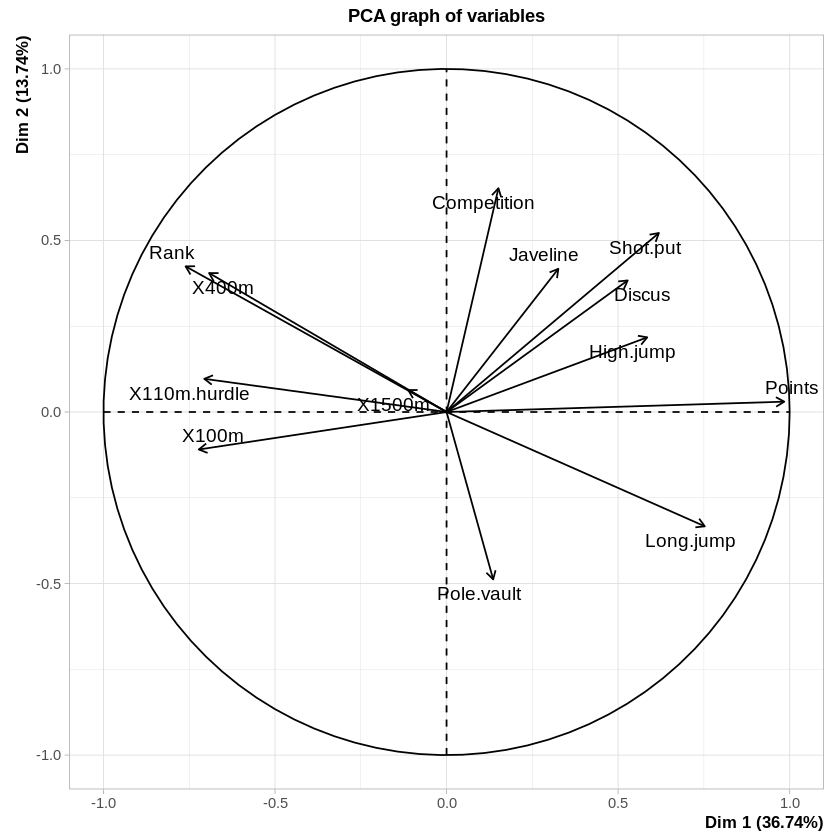

In [523]:
plot.PCA(res, choix="var", axes=c(1, 2), ncp = 10)

In PCA we should not consider the X1500m variable, as we want to predict this variable.
Also from the previous task we know that we also should not include Rank and Points variables in our model.


In [526]:
res <- PCA(decathlon, quanti.sup = c(10:12), ncp = 10)


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


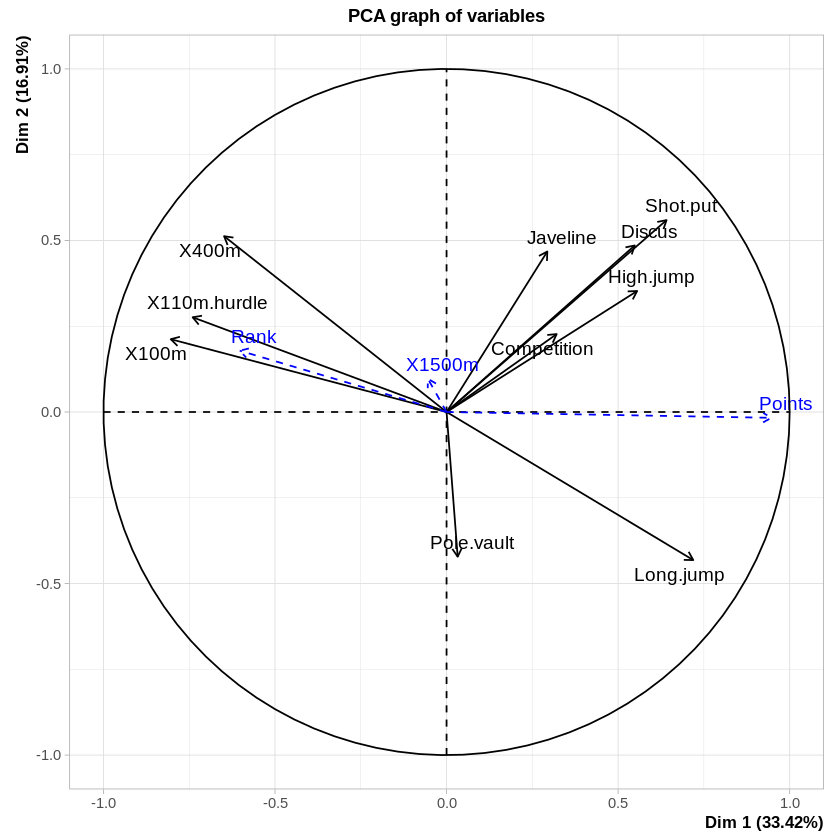

In [527]:
plot.PCA(res, axes=c(1, 2), choix="var", ncp = 10)

After eliminating X1500m, Points and Rank variables from PCA the variation in the first dimension decreased and the variation in the second dimension increased.

In [528]:
res$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.3416485,33.416485,33.41649
comp 2,1.6910124,16.910124,50.32661
comp 3,1.2338861,12.338861,62.66547
comp 4,1.0807109,10.807109,73.47258
comp 5,0.7894027,7.894027,81.36661
comp 6,0.6134908,6.134908,87.50151
comp 7,0.4126831,4.126831,91.62834
comp 8,0.4052996,4.052996,95.68134
comp 9,0.2380949,2.380949,98.06229
comp 10,0.1937711,1.937711,100.00000


We can check the variation in each principal component, also the cumulative percentage of variance, which means we know how many principal components we should leave to remain a specific percentage of variance.

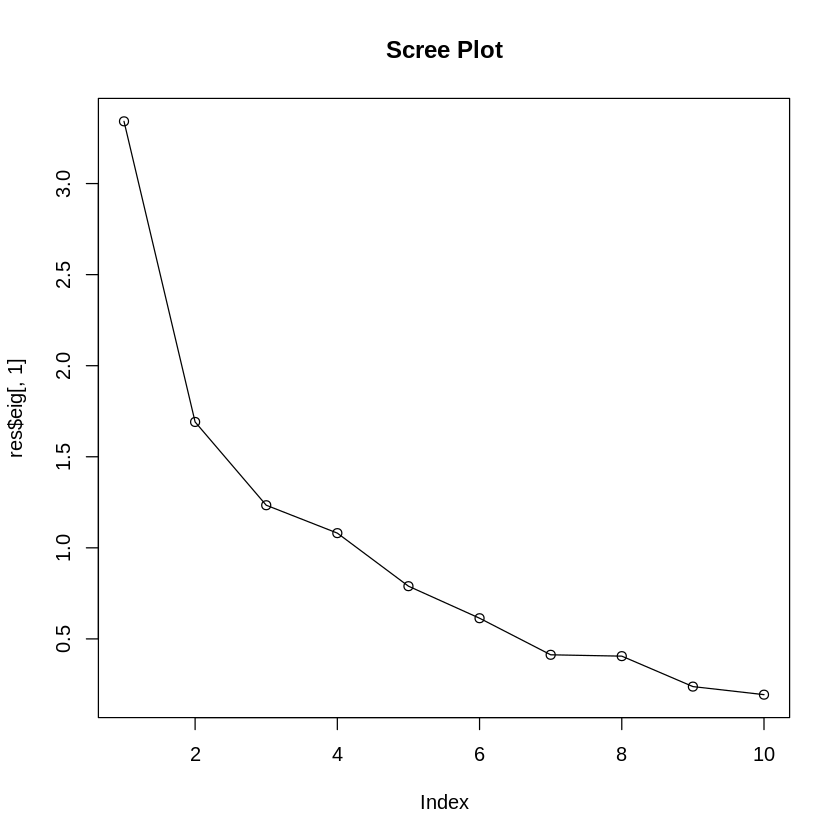

In [529]:
plot(res$eig[,1], type="o", main="Scree Plot")

We should find the elbow, so the number of principal components where eigenvalues are leveling off. On this graph it is 3 principal components, this allows us to keep almost 63% of variation.

In [554]:
## Component Loadings ## 
res$var$coord
res$var$coord[,1:3]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.80375792,0.2121185,0.36644639,-0.004849123,-0.07038707,-0.07522685,-0.10027968,-9.494660e-02,0.38056288,-0.01265132
Long.jump,0.71902293,-0.4315127,0.10507862,0.116880952,-0.22105857,0.01296638,0.29264620,2.917328e-01,0.19381925,-0.12144728
Shot.put,0.64115334,0.5592746,0.09576916,0.266058529,0.24505223,0.04849200,0.02909271,-2.350030e-01,0.01153752,-0.27850923
High.jump,0.55546011,0.3526622,0.39219320,-0.132258893,-0.21655570,0.57057997,-0.07823984,1.133221e-02,0.00945048,0.13033975
X400m,-0.64840502,0.5123973,-0.08437960,0.117647991,0.18794654,0.14614913,-0.07089196,4.715063e-01,-0.04582411,-0.09965844
X110m.hurdle,-0.73996769,0.2760499,-0.02235663,0.262531727,-0.13556699,0.13539905,0.49436855,-1.319075e-01,-0.06694955,0.06187202
Discus,0.54841299,0.4854139,0.36783035,-0.099654687,0.32627187,-0.36530278,0.15765986,1.177346e-01,0.01532962,0.19883097
Pole.vault,0.03238867,-0.4217449,0.13236792,0.806492687,0.32861793,0.13262840,-0.10131334,-3.898891e-05,0.03392886,0.12702332
Javeline,0.29365964,0.4678044,-0.22591777,0.478358597,-0.56646582,-0.25698509,-0.15239691,3.767522e-02,-0.01584024,0.05689687
Competition,0.32092230,0.2270800,-0.84504163,-0.082427272,0.19901147,0.15159280,0.04738799,-2.869253e-02,0.21739199,0.10788815


,Dim.1,Dim.2,Dim.3
X100m,-0.80375792,0.2121185,0.36644639
Long.jump,0.71902293,-0.4315127,0.10507862
Shot.put,0.64115334,0.5592746,0.09576916
High.jump,0.55546011,0.3526622,0.39219320
X400m,-0.64840502,0.5123973,-0.08437960
X110m.hurdle,-0.73996769,0.2760499,-0.02235663
Discus,0.54841299,0.4854139,0.36783035
Pole.vault,0.03238867,-0.4217449,0.13236792
Javeline,0.29365964,0.4678044,-0.22591777
Competition,0.32092230,0.2270800,-0.84504163


We can check loading of each variable in each dimension. The absolute value of the variable is the value of loadings.
The first dimension is an indicator mainly of 'X100m', 'X110m.hurdle' and 'Long.jump' variables.
The second dimension is an indicator mainly of 'Shot.put' and 'X400m' variables.
The third dimension is an indicator mainly of the 'Competition' variable.


,Dim.1,Dim.2,Dim.3
SEBRLE,0.54402661,0.008703947,1.5085893
CLAY,1.03034619,-0.700416606,1.0293393
KARPOV,1.09252036,-0.874168412,2.4156109
BERNARD,-0.87160089,-1.277501866,0.6210359
YURKOV,-0.83532177,2.147519622,1.9407016
WARNERS,0.03734855,-2.161473860,1.4627682
ZSIVOCZKY,-0.05705140,-0.850724336,1.5196447
McMULLEN,0.33524230,-0.055110759,1.3908097
MARTINEAU,-2.30496895,0.648161305,2.2972744
HERNU,-1.77343310,-0.095970097,1.2234396


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


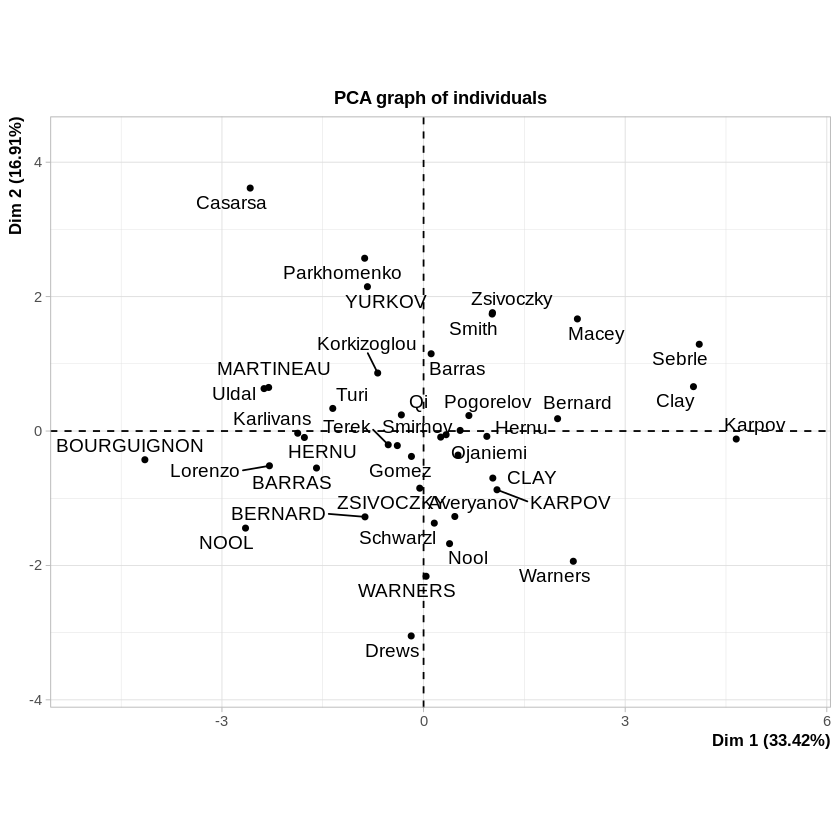

In [555]:
res$ind$coord[,1:3]
plot(res)

### Principal Component Regression

In [556]:
decathlon$PC1<-res$ind$coord[,1]
decathlon$PC2<-res$ind$coord[,2]
decathlon$PC3<-res$ind$coord[,3]

In [557]:
cor(train)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Competition
X100m,1.00000000,-0.52134973,0.2627119616,0.23587487,-0.4088559444,-0.545143837,0.091352867,0.154121562,-0.21248744,0.08426214,0.481395875
Long.jump,-0.52134973,1.00000000,-0.0486792618,-0.24381627,0.5135304032,0.418967338,-0.133320844,-0.243572171,0.20070031,0.06751825,-0.012239361
Shot.put,0.26271196,-0.04867926,1.0000000000,0.43053689,-0.0002454305,-0.164037570,0.659824224,0.113504943,-0.44830796,0.17802405,0.214089842
High.jump,0.23587487,-0.24381627,0.4305368923,1.00000000,-0.1272799662,-0.229049297,0.416553631,-0.167657927,-0.21624943,0.03098685,-0.130304004
X400m,-0.40885594,0.51353040,-0.0002454305,-0.12727997,1.0000000000,0.484934084,0.038254448,-0.171549495,0.05122006,0.45152497,0.099936384
X110m.hurdle,-0.54514384,0.41896734,-0.1640375704,-0.22904930,0.4849340840,1.000000000,-0.183470500,0.006784294,0.05430533,0.03565826,-0.138124544
Discus,0.09135287,-0.13332084,0.6598242236,0.41655363,0.0382544484,-0.183470500,1.000000000,-0.152201432,-0.16551055,0.26520102,-0.009947658
Pole.vault,0.15412156,-0.24357217,0.1135049425,-0.16765793,-0.1715494953,0.006784294,-0.152201432,1.000000000,-0.01037601,0.17617666,-0.065460176
Javeline,-0.21248744,0.20070031,-0.4483079586,-0.21624943,0.0512200619,0.054305326,-0.165510548,-0.010376009,1.00000000,0.22823268,-0.250929825
X1500m,0.08426214,0.06751825,0.1780240511,0.03098685,0.4515249674,0.035658259,0.265201018,0.176176660,0.22823268,1.00000000,-0.026414728


We can notice that between PCs there is almost no correlation.

In [558]:
reg_pc_final <-lm(X1500m~PC1 + PC2 + PC3, data=decathlon)
summary(reg_pc_final)


Call:
lm(formula = X1500m ~ PC1 + PC2 + PC3, data = decathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.291  -5.933   0.166   4.245  38.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 279.0249     1.8411 151.555   <2e-16 ***
PC1          -0.3440     1.0071  -0.342    0.735    
PC2           0.8602     1.4158   0.608    0.547    
PC3           2.1831     1.6574   1.317    0.196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.79 on 37 degrees of freedom
Multiple R-squared:  0.05662,	Adjusted R-squared:  -0.01987 
F-statistic: 0.7403 on 3 and 37 DF,  p-value: 0.5348


In [559]:
vif(reg_pc_final)

PC1 PC2 PC3 
  1   1   1

There is no multicollinearity as we are using principals components (no correlation between PCs)

#### Assumptions

##### Normality

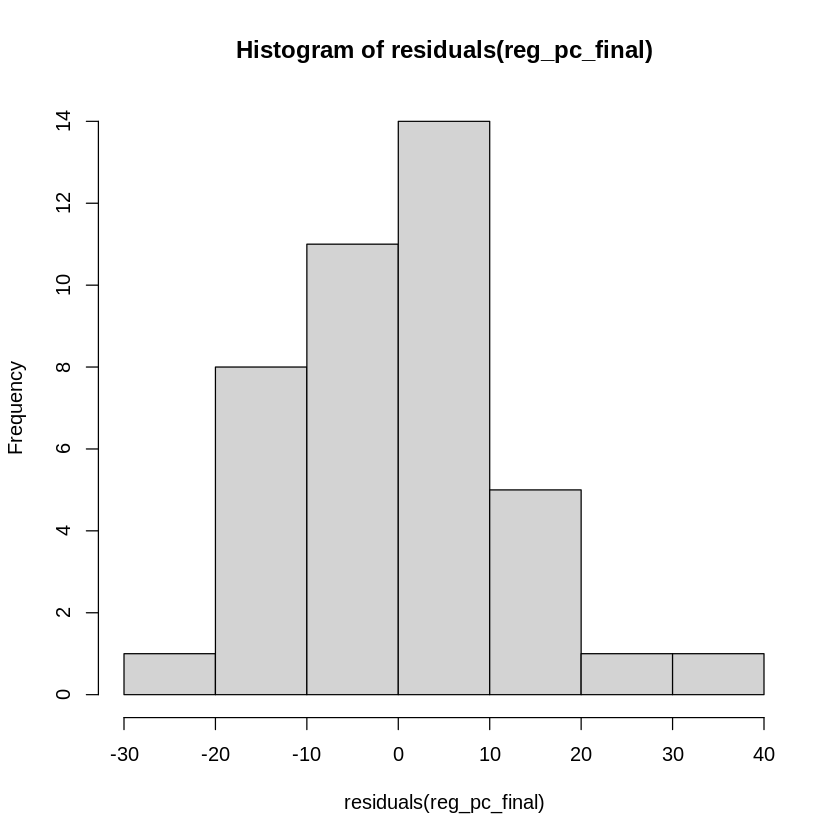

In [560]:
hist(residuals(reg_pc_final))

In [561]:
shapiro.test(residuals(reg_pc_final))


	Shapiro-Wilk normality test

data:  residuals(reg_pc_final)
W = 0.94901, p-value = 0.06459


p-value > 0.05, test is valid

##### Homogenity of Variance

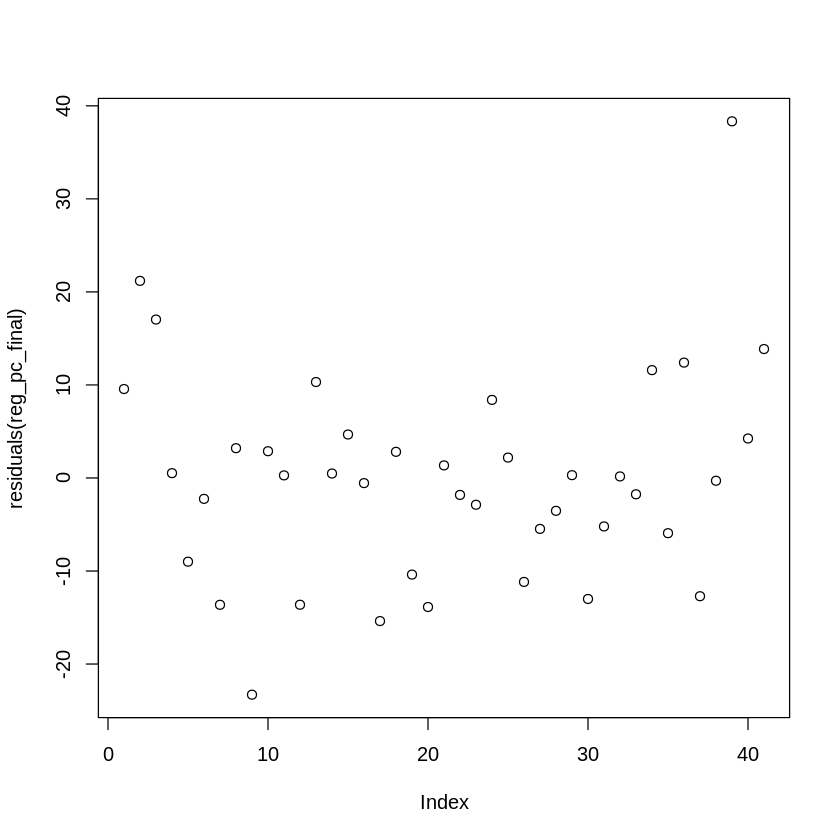

In [562]:
plot(residuals(reg_pc_final))

In [563]:
bptest(reg_pc_final)


	studentized Breusch-Pagan test

data:  reg_pc_final
BP = 2.6049, df = 3, p-value = 0.4566


p-value > 0.05, test is valid

##### The independence of errors

In [564]:
dwtest(reg_pc_final, alternative = "two.sided")


	Durbin-Watson test

data:  reg_pc_final
DW = 1.8034, p-value = 0.3867
alternative hypothesis: true autocorrelation is not 0


p-value > 0.05, test is valid

All assumptions are valid.

In [568]:
RMSE_train1<- sqrt(sum((reg_pc_final$residuals)^2)/nrow(decathlon))
RMSE_train1

[1] 11.19883